In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from IPython.display import display_html

# Command to tell Python to actually display the graphs
%matplotlib inline

# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn import svm

from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, cross_val_score

from scipy import stats

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the DataSet and exporting that in the DataFrame
safety_df_bow = pd.read_csv("D:\\MS Data Science\\Project 10\\ps_bow.csv")
safety_df_bow.name = "BOW"
safety_df_bigram = pd.read_csv("D:\\MS Data Science\\Project 10\\ps_bigram.csv")
safety_df_bigram.name = "BIGRAM"
safety_df_trigram = pd.read_csv("D:\\MS Data Science\\Project 10\\ps_trigram.csv")
safety_df_trigram.name = "TRIGRAM"
safety_df_tfidf = pd.read_csv("D:\\MS Data Science\\Project 10\\nlp_chatbot_TF_IDF.csv")
safety_df_tfidf.name = "TFIDF"

In [3]:
# Function to display the dataset

def display_df(df_name):
    # Displaying the first 5 lines of the dataframe
    print("Displaying the first 5 lines of dataframe", df_name.name)
    display_html(df_name.head())
    print("\n")
    # Displaying the shape of the dataframe
    print("Shape of dataframe", df_name.name)
    print(df_name.shape)

In [4]:
# Function to upsample the target variable

def upsample_df(df_name):
    # Getting the unique value counts from the target column
    print("Displaying the unique values of target column for dataframe", df_name.name)
    print(df_name['Accident Level'].value_counts())
    # Splitting the data
    X = df_name.drop(columns='Accident Level')
    y = df_name['Accident Level']
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X,y)
    print("The shape for data frame X")
    print(X_smote.shape)
    print("The shape for data frame y")
    print(y_smote.shape)
    print('Unique Values for the target variable after sampling:')
    print(y_smote.value_counts())
    # Splitting the training data and test data in 80:20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 10)
    print("The shape for data frame X_train")
    print(X_train.shape)
    print("The shape for data frame X_test")
    print(X_test.shape)
    print("The shape for data frame y_train")
    print(y_train.shape)
    print("The shape for data frame y_test")
    print(y_test.shape)
    return X_train, y_train, X_test, y_test

In [5]:
dataframe_list = [safety_df_bow, safety_df_bigram, safety_df_trigram, safety_df_tfidf]
for df_name in dataframe_list:
    display_df(df_name)

Displaying the first 5 lines of dataframe BOW


Accident Level 
 Potential Accident Level 
 Genre 
 Countries_Country_01 
 Countries_Country_02 
 Countries_Country_03 
 Local_Local_01 
 Local_Local_02 
 Local_Local_03 
 Local_Local_04 
 ... 
 cv_wore 
 cv_work 
 cv_worker 
 cv_workshop 
 cv_would 
 cv_wound 
 cv_wrench 
 cv_wrist 
 cv_zinc 
 cv_zone 
 
 
 
 
 0 
 1 
 4 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 1 
 1 
 4 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2 
 1 
 3 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 3 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 4 
 4 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 
 5 rows × 1057 columns



Shape of dataframe BOW
(418, 1057)
Displaying the first 5 lines of dataframe BIGRAM


Accident Level 
 Potential Accident Level 
 Genre 
 Countries_Country_01 
 Countries_Country_02 
 Countries_Country_03 
 Local_Local_01 
 Local_Local_02 
 Local_Local_03 
 Local_Local_04 
 ... 
 cv_worker use 
 cv_worker wear 
 cv_workshop level 
 cv_would enter 
 cv_wound left 
 cv_wound right 
 cv_wound sole 
 cv_wrist left 
 cv_zaro team 
 cv_zinc sheet 
 
 
 
 
 0 
 1 
 4 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 1 
 1 
 4 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2 
 1 
 3 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 3 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 4 
 4 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 
 5 rows × 1057 columns



Shape of dataframe BIGRAM
(418, 1057)
Displaying the first 5 lines of dataframe TRIGRAM


Accident Level 
 Potential Accident Level 
 Genre 
 Countries_Country_01 
 Countries_Country_02 
 Countries_Country_03 
 Local_Local_01 
 Local_Local_02 
 Local_Local_03 
 Local_Local_04 
 ... 
 cv_work normal work 
 cv_work pipe impact 
 cv_work sustain shotcreterepentinament 
 cv_worker compani incimmet 
 cv_worker time accid 
 cv_worker use helmet 
 cv_worker wear safeti 
 cv_would correspond electr 
 cv_would enter forest 
 cv_zaro team compos 
 
 
 
 
 0 
 1 
 4 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 1 
 1 
 4 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2 
 1 
 3 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 3 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 4 
 4 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 
 5 rows × 1057 columns



Shape of dataframe TRIGRAM
(418, 1057)
Displaying the first 5 lines of dataframe TFIDF


Accident Level 
 Potential Accident Level 
 Gender 
 Country_Country_01 
 Country_Country_02 
 Country_Country_03 
 Local_Local_01 
 Local_Local_02 
 Local_Local_03 
 Local_Local_04 
 ... 
 TFIDF_safety gloves 
 TFIDF_split set 
 TFIDF_support mesh 
 TFIDF_time accident 
 TFIDF_time event 
 TFIDF_transfer medical 
 TFIDF_use safety 
 TFIDF_wear safety 
 TFIDF_work area 
 TFIDF_worker wear 
 
 
 
 
 0 
 1 
 4 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 1 
 1 
 4 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 2 
 1 
 3 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 3 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 4 
 4 
 4 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 
 5 rows × 157 columns



Shape of dataframe TFIDF
(418, 157)


In [6]:
#for df_name in dataframe_list:
#    X_train, y_train, X_test, y_test = upsample_df(df_name)

In [7]:
All_Model_Results = pd.DataFrame(columns=['Model Name','Training Accuracy','Testing Accuracy','Training Recall',
                                          'Testing Recall','Training Precision','Testing Precision'])

In [8]:
def Generate_Classification_Report(model_name, model_print_name):

    print('Printing classification report for the model ', model_name)

    y_train_pred = model_name.predict(X_train)
    y_test_pred = model_name.predict(X_test)

    print("Train Classification Report")
    print(metrics.classification_report(y_train, y_train_pred));

    print ("\n")

    print("Test Classification Report")
    print(metrics.classification_report(y_test, y_test_pred));
    
    print ("\n")
    
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    train_recall = metrics.recall_score(y_train, y_train_pred, average='macro')
    test_recall = metrics.recall_score(y_test, y_test_pred, average='macro')
    train_precision = metrics.precision_score(y_train, y_train_pred, average='macro')
    test_precision = metrics.precision_score(y_test, y_test_pred, average='macro')
    
    All_Model_Results.loc[len(All_Model_Results.index)] = [model_print_name, train_accuracy, test_accuracy,
                                                          train_recall,test_recall,train_precision,test_precision]  

    display_html(All_Model_Results)

In [9]:
def Generate_Confusion_Metrics(model_name):
    # calculate accuracy measures and confusion matrix
    print ("\n")
    print('Printing confusion matrix for the model', model_name)

    y_train_pred = model_name.predict(X_train)
    y_test_pred = model_name.predict(X_test)
    
    c_matrix = metrics.confusion_matrix(y_train, y_train_pred)
    df_cmatrix = pd.DataFrame(c_matrix, index = [i for i in ["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"]],
                  columns = [i for i in ["Predicted 1","Precited 2","Predicted 3","Precited 4","Predicted 5"]])
    plt.figure(figsize = (7,5))
    plt.title('Training Confusion Matrix')
    display_html(sns.heatmap(df_cmatrix, annot=True, fmt='.0f'))
    print ("\n")
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    df_cmatrix = pd.DataFrame(c_matrix, index = [i for i in ["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"]],
                  columns = [i for i in ["Predicted 1","Precited 2","Predicted 3","Precited 4","Predicted 5"]])
    plt.figure(figsize = (7,5))
    plt.title('Testing Confusion Matrix')
    display_html(sns.heatmap(df_cmatrix, annot=True, fmt='.0f'))
    print ("\n")

In [10]:
def Execute_GridSearch_Store_Results(model_name, Grid_params):
    GS_Model = GridSearchCV(model_name, param_grid=Grid_params,
                           cv=5, verbose=1, n_jobs=-1)
    GS_Model.fit(X_train,y_train)
    
    GridS_results=pd.DataFrame(GS_Model.cv_results_)
    print('Here are the top results for ', model_name)
    GridS_results.sort_values(by=['rank_test_score'],ascending=True)
    
    print('The best results are ', GS_Model.best_params_)
    return(GS_Model.best_params_)

In [11]:
# Function to upsample the target variable

def model_building(df_name, X_train, y_train, X_test, y_test):
    # Instantiating SVM model
    clf_svm = svm.SVC(gamma=0.025, C=3) 
    clf_svm.fit(X_train , y_train)
    
    model_identifier = "SVM Initial Model " + df_name.name
    
    Generate_Classification_Report(clf_svm, model_identifier)
    
    Generate_Confusion_Metrics(clf_svm)
    
    GS_SVM_params = {
        "gamma": [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
        "C": range(1,15),
        'kernel': ['linear','rbf']
    }

    clf_svm_tune = svm.SVC()
    
    best_param = Execute_GridSearch_Store_Results(clf_svm_tune, GS_SVM_params)
    
    clf_svm = svm.SVC(**best_param) 
    clf_svm.fit(X_train, y_train)
    
    model_identifier = "SVM Tuned Model " + df_name.name
    
    Generate_Classification_Report(clf_svm, model_identifier)
    
    Generate_Confusion_Metrics(clf_svm)
    
    # Instantiating Logistic Regression model
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    
    model_identifier = "Logistic Regression Initial Model " + df_name.name
    
    Generate_Classification_Report(lr_model, model_identifier)
    
    Generate_Confusion_Metrics(lr_model)
    
    GS_LR_params = {'C' : [1, 2, 4],
        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
        'max_iter' : [100, 500, 1000, 1500]
    }
    
    clf_lr_tune = LogisticRegression()   
    
    best_param = Execute_GridSearch_Store_Results(clf_lr_tune, GS_LR_params)
    
    lr_model = LogisticRegression(**best_param)
    lr_model.fit(X_train, y_train)
    
    model_identifier = "Logistic Regression Tuned Model " + df_name.name
    
    Generate_Classification_Report(lr_model, model_identifier)
    
    Generate_Confusion_Metrics(lr_model)
    
    KNN = KNeighborsClassifier(n_neighbors= 5)
    KNN.fit(X_train, y_train)
    
    model_identifier = "KNN Initial Model " + df_name.name
    
    Generate_Classification_Report(KNN, model_identifier)
    
    Generate_Confusion_Metrics(KNN)
    
    GS_KNN_params = {
        "n_neighbors":range(3,12,2),
        "weights":['uniform', 'distance'],
        "algorithm" :['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    KNN_tune = KNeighborsClassifier()
    
    best_param = Execute_GridSearch_Store_Results(KNN_tune, GS_KNN_params)
    
    KNN = KNeighborsClassifier(**best_param)
    KNN.fit(X_train, y_train)
    
    model_identifier = "KNN Tuned Model " + df_name.name
    
    Generate_Classification_Report(KNN, model_identifier)
    
    Generate_Confusion_Metrics(KNN)
    
    dTree = DecisionTreeClassifier(random_state=1)
    dTree.fit(X_train, y_train)
    
    model_identifier = "Decision Tree Initial Model " + df_name.name
    
    Generate_Classification_Report(dTree, model_identifier)
    
    Generate_Confusion_Metrics(dTree)
    
    dTree_GS = DecisionTreeClassifier()
    
    GS_DT_params = {
        'criterion': ['gini','entropy'],
        'max_depth': range(1,10),
        'min_samples_split': range(1,10),
        'min_samples_leaf': range(1,5),
        'max_features': ['auto','sqrt','log2']
    }
    
    best_param = Execute_GridSearch_Store_Results(dTree_GS,GS_DT_params)
    
    dTree = DecisionTreeClassifier(**best_param)
    dTree.fit(X_train, y_train)
    
    model_identifier = "Decision Tree Tuned Model " + df_name.name
    
    Generate_Classification_Report(dTree, model_identifier)
    
    Generate_Confusion_Metrics(dTree)
    
    rfcl = RandomForestClassifier(random_state=1)
    rfcl.fit(X_train, y_train)
    
    model_identifier = "Random Forest Initial Model " + df_name.name
    
    Generate_Classification_Report(rfcl, model_identifier)
    
    Generate_Confusion_Metrics(rfcl)
    
    rfcl_GS = RandomForestClassifier()

    GS_RF_params = {
        'criterion': ['gini','entropy'],
        'max_depth': range(1,8),
        'min_samples_split': range(1,10),
        'min_samples_leaf': range(1,5),
        'max_features': ['sqrt','log2'],
        'n_estimators': range(20,100,20)
    }
    
    best_param = Execute_GridSearch_Store_Results(rfcl_GS, GS_RF_params)
    
    rfcl = RandomForestClassifier(**best_param)
    
    rfcl.fit(X_train, y_train)
    
    model_identifier = "Random Forest Tuned Model " + df_name.name
    
    Generate_Classification_Report(rfcl, model_identifier)
    
    Generate_Confusion_Metrics(rfcl)
    
    abcl = AdaBoostClassifier(random_state=1)
    abcl.fit(X_train, y_train)
    
    model_identifier = "AdaBoost Initial Model " + df_name.name
    
    Generate_Classification_Report(abcl, model_identifier)
    
    Generate_Confusion_Metrics(rfcl)
    
    abcl_GS = AdaBoostClassifier()

    GS_ABCL_params = {
        'n_estimators': range(10,100,10),
        'learning_rate': [0.001, 0.01, 0.1, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    }
    
    best_param = Execute_GridSearch_Store_Results(abcl_GS,GS_ABCL_params)
    
    abcl = AdaBoostClassifier(**best_param)
    abcl.fit(X_train, y_train)
    
    model_identifier = "AdaBoost Tuned Model " + df_name.name
    
    Generate_Classification_Report(abcl, model_identifier)
    
    Generate_Confusion_Metrics(abcl)
    
    gbcl = GradientBoostingClassifier(random_state=1)
    gbcl.fit(X_train, y_train)
    
    model_identifier = "Gradient Boost Initial Model " + df_name.name
    
    Generate_Classification_Report(gbcl, model_identifier)
    
    Generate_Confusion_Metrics(gbcl)
    
    gbcl_GS = GradientBoostingClassifier()

    GS_GBCL_params = {
        'loss' : ['log_loss', 'exponential'],
        'learning_rate' : [0.01, 0.1, 1.0],
        'n_estimators' : range(50, 120, 20),
        'criterion' : ['friedman_mse', 'squared_error'],
        'min_samples_split' : range(2, 9, 3),
        'min_samples_leaf' : [3, 4, 5]
    }
    
    best_param = Execute_GridSearch_Store_Results(gbcl_GS, GS_GBCL_params)
    
    gbcl = GradientBoostingClassifier(**best_param)
    gbcl.fit(X_train, y_train)
    
    model_identifier = "Gradient Boost Tuned Model " + df_name.name
    
    Generate_Classification_Report(gbcl, model_identifier)
    
    Generate_Confusion_Metrics(gbcl)

Displaying the unique values of target column for dataframe BOW
1    309
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64
The shape for data frame X
(1545, 1056)
The shape for data frame y
(1545,)
Unique Values for the target variable after sampling:
1    309
4    309
3    309
2    309
5    309
Name: Accident Level, dtype: int64
The shape for data frame X_train
(1236, 1056)
The shape for data frame X_test
(309, 1056)
The shape for data frame y_train
(1236,)
The shape for data frame y_test
(309,)
Printing classification report for the model  SVC(C=3, gamma=0.025)
Train Classification Report
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       242
           2       0.98      0.95      0.97       257
           3       0.97      0.98      0.97       255
           4       0.96      0.97      0.96       240
           5       1.00      1.00      1.00       242

    accuracy                           0.98      1236
 

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.90809 
 0.979955 
 0.916358



Printing confusion matrix for the model SVC(C=3, gamma=0.025)




Fitting 5 folds for each of 196 candidates, totalling 980 fits
Here are the top results for  SVC()
The best results are  {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Printing classification report for the model  SVC(C=5, gamma=0.1)
Train Classification Report
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       242
           2       1.00      0.98      0.99       257
           3       1.00      1.00      1.00       255
           4       0.98      0.99      0.99       240
           5       1.00      1.00      1.00       242

    accuracy                           0.99      1236
   macro avg       0.99      0.99      0.99      1236
weighted avg       0.99      0.99      0.99      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.79      0.99      0.87        67
           2       0.98      0.81      0.88       

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401



Printing confusion matrix for the model SVC(C=5, gamma=0.1)




Printing classification report for the model  LogisticRegression()
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       0.98      0.95      0.97       257
           3       0.98      0.98      0.98       255
           4       0.96      0.99      0.98       240
           5       1.00      1.00      1.00       242

    accuracy                           0.98      1236
   macro avg       0.98      0.99      0.98      1236
weighted avg       0.98      0.98      0.98      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.93      0.85      0.89        67
           2       0.87      0.92      0.90        52
           3       0.89      0.94      0.92        54
           4       0.94      0.94      0.94        69
           5       1.00      1.00      1.00       

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784



Printing confusion matrix for the model LogisticRegression()




Fitting 5 folds for each of 60 candidates, totalling 300 fits
Here are the top results for  LogisticRegression()
The best results are  {'C': 4, 'max_iter': 100, 'solver': 'sag'}
Printing classification report for the model  LogisticRegression(C=4, solver='sag')
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       0.98      0.98      0.98       257
           3       1.00      0.98      0.99       255
           4       0.98      1.00      0.99       240
           5       1.00      1.00      1.00       242

    accuracy                           0.99      1236
   macro avg       0.99      0.99      0.99      1236
weighted avg       0.99      0.99      0.99      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.95      0.85      0.90        67
           2    

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534



Printing confusion matrix for the model LogisticRegression(C=4, solver='sag')




Printing classification report for the model  KNeighborsClassifier()
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      0.09      0.16       242
           2       0.61      0.93      0.74       257
           3       0.83      0.95      0.89       255
           4       0.83      0.97      0.89       240
           5       0.99      1.00      0.99       242

    accuracy                           0.79      1236
   macro avg       0.85      0.79      0.73      1236
weighted avg       0.85      0.79      0.73      1236



Test Classification Report
              precision    recall  f1-score   support

           1       1.00      0.01      0.03        67
           2       0.50      0.85      0.63        52
           3       0.71      0.89      0.79        54
           4       0.81      0.97      0.88        69
           5       0.97      1

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825



Printing confusion matrix for the model KNeighborsClassifier()




Fitting 5 folds for each of 40 candidates, totalling 200 fits
Here are the top results for  KNeighborsClassifier()
The best results are  {'algorithm': 'kd_tree', 'n_neighbors': 3, 'weights': 'distance'}
Printing classification report for the model  KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3, weights='distance')
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       0.99      1.00      1.00       257
           3       1.00      1.00      1.00       255
           4       1.00      0.99      0.99       240
           5       1.00      1.00      1.00       242

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



Test Classification Report
              precision    recall  f1-score   support

    

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140



Printing confusion matrix for the model KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3, weights='distance')




Printing classification report for the model  DecisionTreeClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       0.99      1.00      1.00       257
           3       1.00      1.00      1.00       255
           4       1.00      0.99      0.99       240
           5       1.00      1.00      1.00       242

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.91      0.60      0.72        67
           2       0.73      0.94      0.82        52
           3       0.84      0.89      0.86        54
           4       0.88      

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711



Printing confusion matrix for the model DecisionTreeClassifier(random_state=1)




Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Here are the top results for  DecisionTreeClassifier()
The best results are  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2}
Printing classification report for the model  DecisionTreeClassifier(max_depth=9, max_features='auto', min_samples_leaf=3)
Train Classification Report
              precision    recall  f1-score   support

           1       0.64      0.34      0.45       242
           2       0.48      0.47      0.48       257
           3       0.60      0.25      0.35       255
           4       0.33      0.81      0.47       240
           5       0.92      0.62      0.74       242

    accuracy                           0.49      1236
   macro avg       0.59      0.50      0.50      1236
weighted avg       0.59      0.49      0.49      1236



Test Classification Re

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730



Printing confusion matrix for the model DecisionTreeClassifier(max_depth=9, max_features='auto', min_samples_leaf=3)




Printing classification report for the model  RandomForestClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       1.00      0.99      1.00       257
           3       1.00      1.00      1.00       255
           4       0.99      1.00      0.99       240
           5       1.00      1.00      1.00       242

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.95      0.78      0.85        67
           2       0.83      0.94      0.88        52
           3       0.94      0.93      0.93        54
           4       0.92      

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714



Printing confusion matrix for the model RandomForestClassifier(random_state=1)




Fitting 5 folds for each of 4032 candidates, totalling 20160 fits
Here are the top results for  RandomForestClassifier()
The best results are  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 80}
Printing classification report for the model  RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=7,
                       n_estimators=80)
Train Classification Report
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       242
           2       0.76      0.82      0.79       257
           3       0.84      0.88      0.86       255
           4       0.89      0.78      0.83       240
           5       0.96      1.00      0.98       242

    accuracy                           0.87      1236
   macro avg       0.88      0.88      0.88      1236
weighted avg  

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302



Printing confusion matrix for the model RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=7,
                       n_estimators=80)




Printing classification report for the model  AdaBoostClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       242
           2       0.27      0.96      0.43       257
           3       0.08      0.01      0.01       255
           4       0.00      0.00      0.00       240
           5       0.79      1.00      0.88       242

    accuracy                           0.40      1236
   macro avg       0.23      0.39      0.26      1236
weighted avg       0.23      0.40      0.26      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.22      0.90      0.35        52
           3       0.00      0.00      0.00   

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221



Printing confusion matrix for the model RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=7,
                       n_estimators=80)




Fitting 5 folds for each of 72 candidates, totalling 360 fits
Here are the top results for  AdaBoostClassifier()
The best results are  {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 80}
Printing classification report for the model  AdaBoostClassifier(algorithm='SAMME', n_estimators=80)
Train Classification Report
              precision    recall  f1-score   support

           1       0.78      0.52      0.62       242
           2       0.60      0.76      0.67       257
           3       0.61      0.71      0.65       255
           4       0.82      0.49      0.61       240
           5       0.79      1.00      0.88       242

    accuracy                           0.70      1236
   macro avg       0.72      0.70      0.69      1236
weighted avg       0.72      0.70      0.69      1236



Test Classificat

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377



Printing confusion matrix for the model AdaBoostClassifier(algorithm='SAMME', n_estimators=80)




Printing classification report for the model  GradientBoostingClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       0.98      0.95      0.97       257
           3       0.96      0.97      0.97       255
           4       0.95      0.97      0.96       240
           5       0.99      1.00      1.00       242

    accuracy                           0.98      1236
   macro avg       0.98      0.98      0.98      1236
weighted avg       0.98      0.98      0.98      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.96      0.76      0.85        67
           2       0.81      0.90      0.85        52
           3       0.91      0.93      0.92        54
           4       0.89      0.94      0.92    

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851



Printing confusion matrix for the model GradientBoostingClassifier(random_state=1)




Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Here are the top results for  GradientBoostingClassifier()
The best results are  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 110}
Printing classification report for the model  GradientBoostingClassifier(min_samples_leaf=3, n_estimators=110)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       0.98      0.96      0.97       257
           3       0.96      0.97      0.97       255
           4       0.96      0.97      0.96       240
           5       0.99      1.00      1.00       242

    accuracy                           0.98      1236
   macro avg       0.98      0.98      0.98      1236
weighted avg       0.98      0.98      0.98      1236

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412



Printing confusion matrix for the model GradientBoostingClassifier(min_samples_leaf=3, n_estimators=110)




Displaying the unique values of target column for dataframe BIGRAM
1    309
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64
The shape for data frame X
(1545, 1056)
The shape for data frame y
(1545,)
Unique Values for the target variable after sampling:
1    309
4    309
3    309
2    309
5    309
Name: Accident Level, dtype: int64
The shape for data frame X_train
(1236, 1056)
The shape for data frame X_test
(309, 1056)
The shape for data frame y_train
(1236,)
The shape for data frame y_test
(309,)
Printing classification report for the model  SVC(C=3, gamma=0.025)
Train Classification Report
              precision    recall  f1-score   support

           1       0.94      0.96      0.95       242
           2       0.84      0.83      0.84       257
           3       0.69      0.83      0.75       255
           4       0.86      0.62      0.72       

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165



Printing confusion matrix for the model SVC(C=3, gamma=0.025)




Fitting 5 folds for each of 196 candidates, totalling 980 fits
Here are the top results for  SVC()
The best results are  {'C': 14, 'gamma': 0.1, 'kernel': 'rbf'}
Printing classification report for the model  SVC(C=14, gamma=0.1)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       0.94      0.91      0.92       257
           3       0.86      0.88      0.87       255
           4       0.89      0.87      0.88       240
           5       0.97      1.00      0.98       242

    accuracy                           0.93      1236
   macro avg       0.93      0.93      0.93      1236
weighted avg       0.93      0.93      0.93      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.83      0.88      0.86        67
           2       0.82      0.81      0.82     

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046



Printing confusion matrix for the model SVC(C=14, gamma=0.1)




Printing classification report for the model  LogisticRegression()
Train Classification Report
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       242
           2       0.87      0.85      0.86       257
           3       0.75      0.77      0.76       255
           4       0.81      0.76      0.78       240
           5       0.95      1.00      0.97       242

    accuracy                           0.87      1236
   macro avg       0.87      0.87      0.87      1236
weighted avg       0.87      0.87      0.87      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.95      0.78      0.85        67
           2       0.71      0.87      0.78        52
           3       0.66      0.76      0.71        54
           4       0.81      0.62      0.70        69
           5       0.88      1.00      0.94      

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786



Printing confusion matrix for the model LogisticRegression()




Fitting 5 folds for each of 60 candidates, totalling 300 fits
Here are the top results for  LogisticRegression()
The best results are  {'C': 4, 'max_iter': 100, 'solver': 'newton-cg'}
Printing classification report for the model  LogisticRegression(C=4, solver='newton-cg')
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       242
           2       0.87      0.86      0.86       257
           3       0.77      0.78      0.77       255
           4       0.82      0.80      0.81       240
           5       0.96      1.00      0.98       242

    accuracy                           0.88      1236
   macro avg       0.88      0.88      0.88      1236
weighted avg       0.88      0.88      0.88      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.92      0.72      0.81        67
    

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827



Printing confusion matrix for the model LogisticRegression(C=4, solver='newton-cg')




Printing classification report for the model  KNeighborsClassifier()
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      0.18      0.31       242
           2       0.62      0.86      0.72       257
           3       0.67      0.77      0.71       255
           4       0.73      0.88      0.80       240
           5       0.95      1.00      0.97       242

    accuracy                           0.74      1236
   macro avg       0.79      0.74      0.70      1236
weighted avg       0.79      0.74      0.70      1236



Test Classification Report
              precision    recall  f1-score   support

           1       1.00      0.10      0.19        67
           2       0.53      0.81      0.64        52
           3       0.55      0.61      0.58        54
           4       0.69      0.87      0.77        69
           5       0.89 

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598



Printing confusion matrix for the model KNeighborsClassifier()




Fitting 5 folds for each of 40 candidates, totalling 200 fits
Here are the top results for  KNeighborsClassifier()
The best results are  {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Printing classification report for the model  KNeighborsClassifier(weights='distance')
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       0.94      0.91      0.93       257
           3       0.92      0.82      0.86       255
           4       0.83      0.93      0.88       240
           5       0.97      1.00      0.98       242

    accuracy                           0.93      1236
   macro avg       0.93      0.93      0.93      1236
weighted avg       0.93      0.93      0.93      1236



Test Classification Report
              precision    recall  f1-score   support

           1       1.00      0.10      0.19

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572



Printing confusion matrix for the model KNeighborsClassifier(weights='distance')




Printing classification report for the model  DecisionTreeClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       0.94      0.91      0.93       257
           3       0.86      0.91      0.88       255
           4       0.93      0.85      0.89       240
           5       0.97      1.00      0.98       242

    accuracy                           0.94      1236
   macro avg       0.94      0.94      0.94      1236
weighted avg       0.94      0.94      0.94      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.90      0.55      0.69        67
           2       0.67      0.87      0.76        52
           3       0.70      0.80      0.75        54
           4       0.84      0.81      0.82        69
           

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526



Printing confusion matrix for the model DecisionTreeClassifier(random_state=1)




Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Here are the top results for  DecisionTreeClassifier()
The best results are  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8}
Printing classification report for the model  DecisionTreeClassifier(max_depth=9, max_features='auto', min_samples_leaf=2,
                       min_samples_split=8)
Train Classification Report
              precision    recall  f1-score   support

           1       0.74      0.42      0.53       242
           2       0.58      0.13      0.21       257
           3       0.31      0.93      0.47       255
           4       0.77      0.04      0.08       240
           5       0.89      1.00      0.94       242

    accuracy                           0.50      1236
   macro avg       0.66      0.50      0.45      1236
weighted avg       0.65      0.50  

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159



Printing confusion matrix for the model DecisionTreeClassifier(max_depth=9, max_features='auto', min_samples_leaf=2,
                       min_samples_split=8)




Printing classification report for the model  RandomForestClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       0.95      0.91      0.93       257
           3       0.85      0.93      0.89       255
           4       0.93      0.85      0.89       240
           5       0.97      1.00      0.98       242

    accuracy                           0.94      1236
   macro avg       0.94      0.94      0.94      1236
weighted avg       0.94      0.94      0.94      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.98      0.61      0.75        67
           2       0.73      0.87      0.79        52
           3       0.68      0.78      

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558



Printing confusion matrix for the model RandomForestClassifier(random_state=1)




Fitting 5 folds for each of 4032 candidates, totalling 20160 fits
Here are the top results for  RandomForestClassifier()
The best results are  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 80}
Printing classification report for the model  RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=1,
                       n_estimators=80)
Train Classification Report
              precision    recall  f1-score   support

           1       0.95      0.84      0.89       242
           2       0.64      0.56      0.59       257
           3       0.60      0.80      0.69       255
           4       0.86      0.41      0.56       240
           5       0.70      1.00      0.82       242

    accuracy                           0.72      1236
   macro avg       0.75      0.72      0.71      1236
weighted avg  

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040



Printing confusion matrix for the model RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=1,
                       n_estimators=80)




Printing classification report for the model  AdaBoostClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       242
           2       0.27      0.98      0.42       257
           3       0.83      0.02      0.04       255
           4       0.00      0.00      0.00       240
           5       0.84      1.00      0.91       242

    accuracy                           0.40      1236
   macro avg       0.39      0.40      0.27      1236
weighted avg       0.39      0.40      0.27      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.23      1.00      0.37        52
           3       0.00      0.00      0.00   

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463



Printing confusion matrix for the model RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=1,
                       n_estimators=80)




Fitting 5 folds for each of 72 candidates, totalling 360 fits
Here are the top results for  AdaBoostClassifier()
The best results are  {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 90}
Printing classification report for the model  AdaBoostClassifier(algorithm='SAMME', n_estimators=90)
Train Classification Report
              precision    recall  f1-score   support

           1       0.60      0.41      0.49       242
           2       0.50      0.54      0.52       257
           3       0.47      0.50      0.49       255
           4       0.50      0.48      0.49       240
           5       0.83      1.00      0.91       242

    accuracy                           0.59      1236
   macro avg       0.58      0.59      0.58      1236
weighted avg       0.58      0.59      0.58      1236



Test Classificat

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324



Printing confusion matrix for the model AdaBoostClassifier(algorithm='SAMME', n_estimators=90)




Printing classification report for the model  GradientBoostingClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       0.98      0.97      0.98       242
           2       0.89      0.88      0.89       257
           3       0.81      0.80      0.81       255
           4       0.82      0.82      0.82       240
           5       0.96      1.00      0.98       242

    accuracy                           0.89      1236
   macro avg       0.89      0.90      0.89      1236
weighted avg       0.89      0.89      0.89      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.98      0.67      0.80        67
           2       0.70      0.87      0.78        52
           3       0.67      0.76      0.71        54
           4       0.79      0.72      0.76    

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100



Printing confusion matrix for the model GradientBoostingClassifier(random_state=1)




Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Here are the top results for  GradientBoostingClassifier()
The best results are  {'criterion': 'squared_error', 'learning_rate': 1.0, 'loss': 'log_loss', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 110}
Printing classification report for the model  GradientBoostingClassifier(criterion='squared_error', learning_rate=1.0,
                           min_samples_leaf=4, min_samples_split=5,
                           n_estimators=110)
Train Classification Report
              precision    recall  f1-score   support

           1       0.97      0.91      0.94       242
           2       0.88      0.87      0.88       257
           3       0.81      0.85      0.83       255
           4       0.88      0.87      0.87       240
           5       0.96      1.00      0.98       242

    accuracy                           

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140



Printing confusion matrix for the model GradientBoostingClassifier(criterion='squared_error', learning_rate=1.0,
                           min_samples_leaf=4, min_samples_split=5,
                           n_estimators=110)




Displaying the unique values of target column for dataframe TRIGRAM
1    309
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64
The shape for data frame X
(1545, 1056)
The shape for data frame y
(1545,)
Unique Values for the target variable after sampling:
1    309
4    309
3    309
2    309
5    309
Name: Accident Level, dtype: int64
The shape for data frame X_train
(1236, 1056)
The shape for data frame X_test
(309, 1056)
The shape for data frame y_train
(1236,)
The shape for data frame y_test
(309,)
Printing classification report for the model  SVC(C=3, gamma=0.025)
Train Classification Report
              precision    recall  f1-score   support

           1       0.93      0.83      0.88       242
           2       0.77      0.81   

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297



Printing confusion matrix for the model SVC(C=3, gamma=0.025)




Fitting 5 folds for each of 196 candidates, totalling 980 fits
Here are the top results for  SVC()
The best results are  {'C': 9, 'gamma': 0.4, 'kernel': 'rbf'}
Printing classification report for the model  SVC(C=9, gamma=0.4)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       242
           2       0.91      0.92      0.92       257
           3       0.83      0.83      0.83       255
           4       0.87      0.79      0.83       240
           5       0.91      1.00      0.95       242

    accuracy                           0.91      1236
   macro avg       0.91      0.91      0.90      1236
weighted avg       0.90      0.91      0.90      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.84      0.85      0.84        67
           2       0.75      0.81      0.78       

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019



Printing confusion matrix for the model SVC(C=9, gamma=0.4)




Printing classification report for the model  LogisticRegression()
Train Classification Report
              precision    recall  f1-score   support

           1       0.97      0.92      0.94       242
           2       0.83      0.85      0.84       257
           3       0.72      0.82      0.77       255
           4       0.82      0.62      0.71       240
           5       0.91      1.00      0.95       242

    accuracy                           0.84      1236
   macro avg       0.85      0.84      0.84      1236
weighted avg       0.85      0.84      0.84      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.98      0.73      0.84        67
           2       0.62      0.79      0.69        52
           3       0.62      0.72      0.67        54
           4       0.85      0.67      0.75        69
           5       0.88      1.00      0.94       

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738



Printing confusion matrix for the model LogisticRegression()




Fitting 5 folds for each of 60 candidates, totalling 300 fits
Here are the top results for  LogisticRegression()
The best results are  {'C': 4, 'max_iter': 100, 'solver': 'newton-cg'}
Printing classification report for the model  LogisticRegression(C=4, solver='newton-cg')
Train Classification Report
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       242
           2       0.83      0.89      0.86       257
           3       0.80      0.73      0.76       255
           4       0.80      0.72      0.76       240
           5       0.91      1.00      0.95       242

    accuracy                           0.86      1236
   macro avg       0.86      0.86      0.86      1236
weighted avg       0.86      0.86      0.86      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.98      0.73      0.84        67
    

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553



Printing confusion matrix for the model LogisticRegression(C=4, solver='newton-cg')




Printing classification report for the model  KNeighborsClassifier()
Train Classification Report
              precision    recall  f1-score   support

           1       0.98      0.48      0.64       242
           2       0.70      0.88      0.78       257
           3       0.69      0.80      0.75       255
           4       0.73      0.69      0.71       240
           5       0.89      1.00      0.94       242

    accuracy                           0.77      1236
   macro avg       0.80      0.77      0.76      1236
weighted avg       0.80      0.77      0.76      1236



Test Classification Report
              precision    recall  f1-score   support

           1       1.00      0.31      0.48        67
           2       0.54      0.85      0.66        52
           3       0.58      0.69      0.63        54
           4       0.71      0.68      0.70        69
           5       0.87 

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717



Printing confusion matrix for the model KNeighborsClassifier()




Fitting 5 folds for each of 40 candidates, totalling 200 fits
Here are the top results for  KNeighborsClassifier()
The best results are  {'algorithm': 'kd_tree', 'n_neighbors': 5, 'weights': 'distance'}
Printing classification report for the model  KNeighborsClassifier(algorithm='kd_tree', weights='distance')
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       242
           2       0.95      0.87      0.91       257
           3       0.81      0.84      0.83       255
           4       0.80      0.82      0.81       240
           5       0.93      0.95      0.94       242

    accuracy                           0.89      1236
   macro avg       0.90      0.90      0.90      1236
weighted avg       0.90      0.89      0.90      1236



Test Classification Report
              precision    recall  f1-score   support

           1       

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315



Printing confusion matrix for the model KNeighborsClassifier(algorithm='kd_tree', weights='distance')




Printing classification report for the model  DecisionTreeClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       242
           2       0.90      0.94      0.92       257
           3       0.85      0.81      0.83       255
           4       0.87      0.79      0.83       240
           5       0.91      1.00      0.95       242

    accuracy                           0.91      1236
   macro avg       0.90      0.91      0.90      1236
weighted avg       0.90      0.91      0.90      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.98      0.66      0.79        67
           2       0.67      0.83      0.74        52
           3       0.66      0.74      0.70        54
           4       0.84      0.75      0.79 

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846



Printing confusion matrix for the model DecisionTreeClassifier(random_state=1)




Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Here are the top results for  DecisionTreeClassifier()
The best results are  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6}
Printing classification report for the model  DecisionTreeClassifier(max_depth=9, max_features='sqrt', min_samples_split=6)
Train Classification Report
              precision    recall  f1-score   support

           1       0.89      0.28      0.43       242
           2       0.29      0.72      0.42       257
           3       0.32      0.30      0.31       255
           4       0.78      0.06      0.11       240
           5       0.89      1.00      0.94       242

    accuracy                           0.47      1236
   macro avg       0.63      0.47      0.44      1236
weighted avg       0.63      0.47      0.44      1236



Test Classification R

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222



Printing confusion matrix for the model DecisionTreeClassifier(max_depth=9, max_features='sqrt', min_samples_split=6)




Printing classification report for the model  RandomForestClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       242
           2       0.90      0.94      0.92       257
           3       0.85      0.81      0.83       255
           4       0.86      0.80      0.83       240
           5       0.91      1.00      0.95       242

    accuracy                           0.91      1236
   macro avg       0.90      0.91      0.90      1236
weighted avg       0.90      0.91      0.90      1236



Test Classification Report
              precision    recall  f1-score   support

           1       1.00      0.58      0.74        67
           2       0.66      0.85      0.74        52
           3       0.65      0.76      0.70        54
           4       0.82     

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model RandomForestClassifier(random_state=1)




Fitting 5 folds for each of 4032 candidates, totalling 20160 fits
Here are the top results for  RandomForestClassifier()
The best results are  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 60}
Printing classification report for the model  RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=1,
                       n_estimators=60)
Train Classification Report
              precision    recall  f1-score   support

           1       0.89      0.74      0.80       242
           2       0.68      0.71      0.69       257
           3       0.58      0.81      0.68       255
           4       0.78      0.27      0.40       240
           5       0.74      1.00      0.85       242

    accuracy                           0.71      1236
   macro avg       0.73      0.70      0.68      1236
weighted avg  

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=1,
                       n_estimators=60)




Printing classification report for the model  AdaBoostClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       0.33      0.31      0.32       242
           2       0.22      0.23      0.22       257
           3       0.39      0.66      0.49       255
           4       0.64      0.04      0.07       240
           5       0.86      1.00      0.93       242

    accuracy                           0.45      1236
   macro avg       0.49      0.45      0.40      1236
weighted avg       0.48      0.45      0.40      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.41      0.31      0.36        67
           2       0.19      0.25      0.21        52
           3       0.36      0.67      0.46   

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=1,
                       n_estimators=60)




Fitting 5 folds for each of 72 candidates, totalling 360 fits
Here are the top results for  AdaBoostClassifier()
The best results are  {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 70}
Printing classification report for the model  AdaBoostClassifier(algorithm='SAMME', n_estimators=70)
Train Classification Report
              precision    recall  f1-score   support

           1       0.47      0.25      0.33       242
           2       0.47      0.52      0.49       257
           3       0.44      0.64      0.52       255
           4       0.69      0.44      0.54       240
           5       0.81      1.00      0.89       242

    accuracy                           0.57      1236
   macro avg       0.58      0.57      0.56      1236
weighted avg       0.57      0.57      0.55      1236



Test Classificat

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model AdaBoostClassifier(algorithm='SAMME', n_estimators=70)




Printing classification report for the model  GradientBoostingClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       0.97      0.93      0.95       242
           2       0.88      0.90      0.89       257
           3       0.80      0.78      0.79       255
           4       0.81      0.77      0.79       240
           5       0.91      1.00      0.95       242

    accuracy                           0.88      1236
   macro avg       0.88      0.88      0.88      1236
weighted avg       0.88      0.88      0.88      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.90      0.64      0.75        67
           2       0.64      0.83      0.72        52
           3       0.67      0.63      0.65        54
           4       0.80      0.77      0.79    

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model GradientBoostingClassifier(random_state=1)




Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Here are the top results for  GradientBoostingClassifier()
The best results are  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 110}
Printing classification report for the model  GradientBoostingClassifier(min_samples_leaf=5, n_estimators=110)
Train Classification Report
              precision    recall  f1-score   support

           1       0.91      0.85      0.88       242
           2       0.84      0.87      0.85       257
           3       0.79      0.78      0.79       255
           4       0.79      0.75      0.76       240
           5       0.91      1.00      0.95       242

    accuracy                           0.85      1236
   macro avg       0.85      0.85      0.85      1236
weighted avg       0.85      0.85      0.85      1236

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model GradientBoostingClassifier(min_samples_leaf=5, n_estimators=110)




Displaying the unique values of target column for dataframe TFIDF
1    309
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64
The shape for data frame X
(1545, 156)
The shape for data frame y
(1545,)
Unique Values for the target variable after sampling:
1    309
4    309
3    309
2    309
5    309
Name: Accident Level, dtype: int64
The shape for data frame X_train
(1236, 156)
The shape for data frame X_test
(309, 156)
The shape for data frame y_train
(1236,)
The shape for data frame y_test
(309,)
Printing classification report for the model  SVC(C=3, gamma=0.025)
Train Classification Report
              precision    recall  f1-score   support

           1       0.97      0.82      0.89       242
           2       0.93      0.92      0.93       257
           3       0.92      0.98      0.95       255
           4       0.89      0.90      0.90       240


Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model SVC(C=3, gamma=0.025)




Fitting 5 folds for each of 196 candidates, totalling 980 fits
Here are the top results for  SVC()
The best results are  {'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}
Printing classification report for the model  SVC(C=2, gamma=0.5)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       242
           2       1.00      1.00      1.00       257
           3       1.00      1.00      1.00       255
           4       0.99      1.00      1.00       240
           5       1.00      1.00      1.00       242

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.97      0.94      0.95        67
           2       0.94      0.98      0.96       

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model SVC(C=2, gamma=0.5)




Printing classification report for the model  LogisticRegression()
Train Classification Report
              precision    recall  f1-score   support

           1       0.96      0.88      0.92       242
           2       0.95      0.96      0.95       257
           3       0.95      0.99      0.97       255
           4       0.96      0.97      0.96       240
           5       0.98      1.00      0.99       242

    accuracy                           0.96      1236
   macro avg       0.96      0.96      0.96      1236
weighted avg       0.96      0.96      0.96      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.95      0.78      0.85        67
           2       0.82      0.90      0.86        52
           3       0.95      1.00      0.97        54
           4       0.94      0.99      0.96        69
           5       0.99      1.00      0.99       

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model LogisticRegression()




Fitting 5 folds for each of 60 candidates, totalling 300 fits
Here are the top results for  LogisticRegression()
The best results are  {'C': 4, 'max_iter': 100, 'solver': 'newton-cg'}
Printing classification report for the model  LogisticRegression(C=4, solver='newton-cg')
Train Classification Report
              precision    recall  f1-score   support

           1       0.97      0.95      0.96       242
           2       0.97      0.97      0.97       257
           3       0.98      1.00      0.99       255
           4       0.99      1.00      0.99       240
           5       1.00      1.00      1.00       242

    accuracy                           0.98      1236
   macro avg       0.98      0.98      0.98      1236
weighted avg       0.98      0.98      0.98      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.95      0.85      0.90        67
    

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model LogisticRegression(C=4, solver='newton-cg')




Printing classification report for the model  KNeighborsClassifier()
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      0.56      0.72       242
           2       0.83      0.98      0.89       257
           3       0.86      0.99      0.92       255
           4       0.91      0.97      0.94       240
           5       0.97      1.00      0.99       242

    accuracy                           0.90      1236
   macro avg       0.91      0.90      0.89      1236
weighted avg       0.91      0.90      0.89      1236



Test Classification Report
              precision    recall  f1-score   support

           1       1.00      0.42      0.59        67
           2       0.74      0.98      0.84        52
           3       0.77      1.00      0.87        54
           4       0.89      0.94      0.92        69
           5       0.97 

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model KNeighborsClassifier()




Fitting 5 folds for each of 40 candidates, totalling 200 fits
Here are the top results for  KNeighborsClassifier()
The best results are  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Printing classification report for the model  KNeighborsClassifier(n_neighbors=3, weights='distance')
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       1.00      1.00      1.00       257
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00       240
           5       1.00      1.00      1.00       242

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.97     

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model KNeighborsClassifier(n_neighbors=3, weights='distance')




Printing classification report for the model  DecisionTreeClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       1.00      1.00      1.00       257
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00       240
           5       1.00      1.00      1.00       242

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.85      0.61      0.71        67
           2       0.74      0.92      0.82        52
           3       0.86      0.93      0.89        54
           4       0.91      0.88      0.90       

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model DecisionTreeClassifier(random_state=1)




Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Here are the top results for  DecisionTreeClassifier()
The best results are  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 1}
Printing classification report for the model  DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_split=1)
Train Classification Report
              precision    recall  f1-score   support

           1       0.77      0.88      0.82       242
           2       0.89      0.89      0.89       257
           3       0.95      0.90      0.92       255
           4       0.96      0.84      0.90       240
           5       0.98      1.00      0.99       242

    accuracy                           0.90      1236
   macro avg       0.91      0.90      0.90      1236
weighted avg       0.91      0.

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_split=1)




Printing classification report for the model  RandomForestClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       1.00      1.00      1.00       257
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00       240
           5       1.00      1.00      1.00       242

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.95      0.90      0.92        67
           2       0.94      0.96      0.95        52
           3       0.95      1.00     

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model RandomForestClassifier(random_state=1)




Fitting 5 folds for each of 4032 candidates, totalling 20160 fits
Here are the top results for  RandomForestClassifier()
The best results are  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 80}
Printing classification report for the model  RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=3,
                       n_estimators=80)
Train Classification Report
              precision    recall  f1-score   support

           1       0.96      0.97      0.96       242
           2       1.00      0.98      0.99       257
           3       0.98      0.98      0.98       255
           4       0.98      0.99      0.99       240
           5       1.00      1.00      1.00       242

    accuracy                           0.98      1236
   macro avg       0.98      0.98      0.98      1236
weighted avg  

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=3,
                       n_estimators=80)




Printing classification report for the model  AdaBoostClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       0.33      0.00      0.01       242
           2       0.28      0.92      0.43       257
           3       0.64      0.30      0.41       255
           4       0.00      0.00      0.00       240
           5       0.87      1.00      0.93       242

    accuracy                           0.45      1236
   macro avg       0.42      0.44      0.36      1236
weighted avg       0.43      0.45      0.36      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.22      0.87      0.36        52
           3       0.55      0.30      0.39   

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=3,
                       n_estimators=80)




Fitting 5 folds for each of 72 candidates, totalling 360 fits
Here are the top results for  AdaBoostClassifier()
The best results are  {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 90}
Printing classification report for the model  AdaBoostClassifier(algorithm='SAMME', n_estimators=90)
Train Classification Report
              precision    recall  f1-score   support

           1       0.70      0.58      0.64       242
           2       0.66      0.74      0.70       257
           3       0.79      0.78      0.79       255
           4       0.83      0.78      0.81       240
           5       0.89      1.00      0.94       242

    accuracy                           0.78      1236
   macro avg       0.78      0.78      0.77      1236
weighted avg       0.77      0.78      0.77      1236



Test Classificat

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model AdaBoostClassifier(algorithm='SAMME', n_estimators=90)




Printing classification report for the model  GradientBoostingClassifier(random_state=1)
Train Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       1.00      1.00      1.00       257
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00       240
           5       1.00      1.00      1.00       242

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



Test Classification Report
              precision    recall  f1-score   support

           1       0.94      0.72      0.81        67
           2       0.78      0.88      0.83        52
           3       0.93      0.98      0.95        54
           4       0.94      0.96      0.95    

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model GradientBoostingClassifier(random_state=1)




Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Here are the top results for  GradientBoostingClassifier()
The best results are  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 90}
Printing classification report for the model  GradientBoostingClassifier(min_samples_leaf=3, min_samples_split=8,
                           n_estimators=90)
Train Classification Report
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       242
           2       1.00      0.99      0.99       257
           3       1.00      1.00      1.00       255
           4       0.99      1.00      1.00       240
           5       1.00      1.00      1.00       242

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighte

Model Name 
 Training Accuracy 
 Testing Accuracy 
 Training Recall 
 Testing Recall 
 Training Precision 
 Testing Precision 
 
 
 
 
 0 
 SVM Initial Model BOW 
 0.979773 
 0.912621 
 0.980128 
 0.908090 
 0.979955 
 0.916358 
 
 
 1 
 SVM Tuned Model BOW 
 0.993528 
 0.922330 
 0.993603 
 0.915955 
 0.993469 
 0.935401 
 
 
 2 
 Logistic Regression Initial Model BOW 
 0.984628 
 0.932039 
 0.985031 
 0.932059 
 0.984806 
 0.928784 
 
 
 3 
 Logistic Regression Tuned Model BOW 
 0.992718 
 0.941748 
 0.992917 
 0.943455 
 0.992801 
 0.939534 
 
 
 4 
 KNN Initial Model BOW 
 0.791262 
 0.734628 
 0.788047 
 0.744197 
 0.849501 
 0.796825 
 
 
 5 
 KNN Tuned Model BOW 
 0.997573 
 0.763754 
 0.997500 
 0.776718 
 0.997674 
 0.816140 
 
 
 6 
 Decision Tree Initial Model BOW 
 0.997573 
 0.864078 
 0.997500 
 0.868251 
 0.997674 
 0.865711 
 
 
 7 
 Decision Tree Tuned Model BOW 
 0.494337 
 0.498382 
 0.497811 
 0.482888 
 0.594657 
 0.531730 
 
 
 8 
 Random Forest Initial Model BOW 
 0.997573 
 0.925566 
 0.997610 
 0.925972 
 0.997559 
 0.924714 
 
 
 9 
 Random Forest Tuned Model BOW 
 0.874595 
 0.747573 
 0.875013 
 0.742589 
 0.879394 
 0.747302 
 
 
 10 
 AdaBoost Initial Model BOW 
 0.397249 
 0.368932 
 0.393787 
 0.380769 
 0.227746 
 0.211221 
 
 
 11 
 AdaBoost Tuned Model BOW 
 0.697411 
 0.679612 
 0.696171 
 0.679958 
 0.718415 
 0.692377 
 
 
 12 
 Gradient Boost Initial Model BOW 
 0.978155 
 0.906149 
 0.978554 
 0.906599 
 0.978321 
 0.905851 
 
 
 13 
 Gradient Boost Tuned Model BOW 
 0.978964 
 0.922330 
 0.979283 
 0.923965 
 0.979126 
 0.923412 
 
 
 14 
 SVM Initial Model BIGRAM 
 0.847087 
 0.789644 
 0.847096 
 0.792396 
 0.855076 
 0.792165 
 
 
 15 
 SVM Tuned Model BIGRAM 
 0.930421 
 0.851133 
 0.931121 
 0.847555 
 0.930728 
 0.847046 
 
 
 16 
 Logistic Regression Initial Model BIGRAM 
 0.869741 
 0.802589 
 0.870861 
 0.804790 
 0.870527 
 0.802786 
 
 
 17 
 Logistic Regression Tuned Model BIGRAM 
 0.882686 
 0.783172 
 0.883979 
 0.785300 
 0.883678 
 0.783827 
 
 
 18 
 KNN Initial Model BIGRAM 
 0.737864 
 0.676375 
 0.736302 
 0.678569 
 0.792516 
 0.731598 
 
 
 19 
 KNN Tuned Model BIGRAM 
 0.929612 
 0.695793 
 0.931017 
 0.698518 
 0.930954 
 0.748572 
 
 
 20 
 Decision Tree Initial Model BIGRAM 
 0.936084 
 0.802589 
 0.936458 
 0.805103 
 0.937621 
 0.806526 
 
 
 21 
 Decision Tree Tuned Model BIGRAM 
 0.504045 
 0.485437 
 0.503368 
 0.486047 
 0.658639 
 0.622159 
 
 
 22 
 Random Forest Initial Model BIGRAM 
 0.936084 
 0.815534 
 0.936428 
 0.816238 
 0.938335 
 0.822558 
 
 
 23 
 Random Forest Tuned Model BIGRAM 
 0.720874 
 0.644013 
 0.721553 
 0.645873 
 0.751057 
 0.666040 
 
 
 24 
 AdaBoost Initial Model BIGRAM 
 0.404531 
 0.385113 
 0.400809 
 0.400000 
 0.387913 
 0.207463 
 
 
 25 
 AdaBoost Tuned Model BIGRAM 
 0.587379 
 0.563107 
 0.588653 
 0.558456 
 0.582859 
 0.551324 
 
 
 26 
 Gradient Boost Initial Model BIGRAM 
 0.894013 
 0.802589 
 0.895035 
 0.804185 
 0.894159 
 0.808100 
 
 
 27 
 Gradient Boost Tuned Model BIGRAM 
 0.898867 
 0.805825 
 0.899715 
 0.806396 
 0.901140 
 0.805140 
 
 
 28 
 SVM Initial Model TRIGRAM 
 0.806634 
 0.783172 
 0.806612 
 0.781163 
 0.811629 
 0.785297 
 
 
 29 
 SVM Tuned Model TRIGRAM 
 0.905340 
 0.831715 
 0.905779 
 0.828467 
 0.905193 
 0.826019 
 
 
 30 
 Logistic Regression Initial Model TRIGRAM 
 0.844660 
 0.783172 
 0.844431 
 0.781739 
 0.848927 
 0.790738 
 
 
 31 
 Logistic Regression Tuned Model TRIGRAM 
 0.862460 
 0.789644 
 0.863217 
 0.785120 
 0.861321 
 0.792553 
 
 
 32 
 KNN Initial Model TRIGRAM 
 0.773463 
 0.699029 
 0.771639 
 0.705186 
 0.800129 
 0.740717 
 
 
 33 
 KNN Tuned Model TRIGRAM 
 0.894822 
 0.728155 
 0.895550 
 0.735015 
 0.897008 
 0.769315 
 
 
 34 
 Decision Tree Initial Model TRIGRAM 
 0.905340 
 0.796117 
 0.905749 
 0.795601 
 0.904769 
 0.802846 
 
 
 35 
 Decision Tree Tuned Model TRIGRAM 
 0.472492 
 0.440129 
 0.470621 
 0.450097 
 0.633944 
 0.596222 
 
 
 36 
 Random 



Printing confusion matrix for the model GradientBoostingClassifier(min_samples_leaf=3, min_samples_split=8,
                           n_estimators=90)






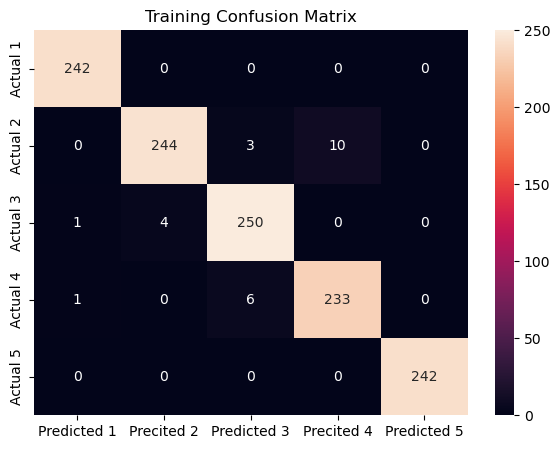

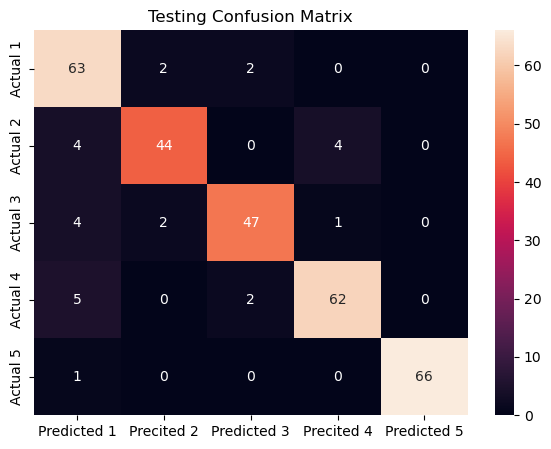

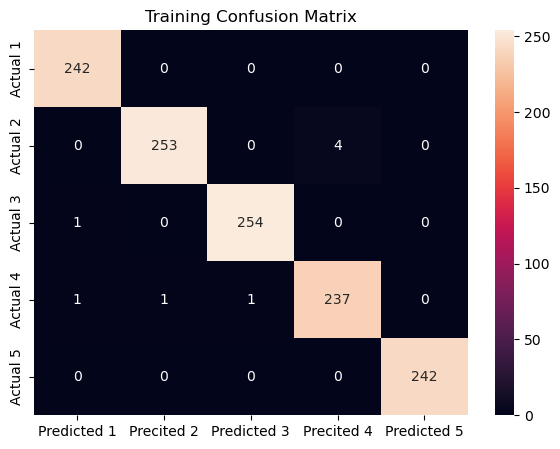

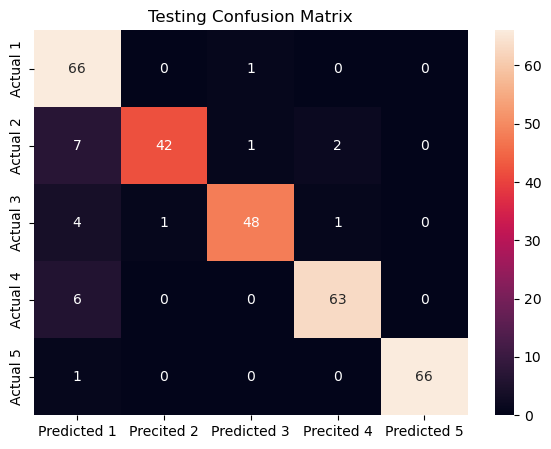

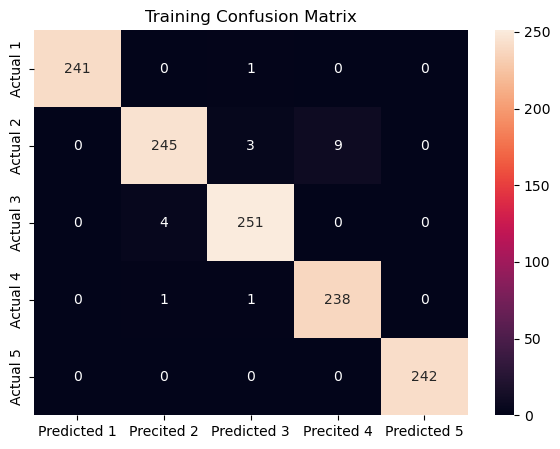

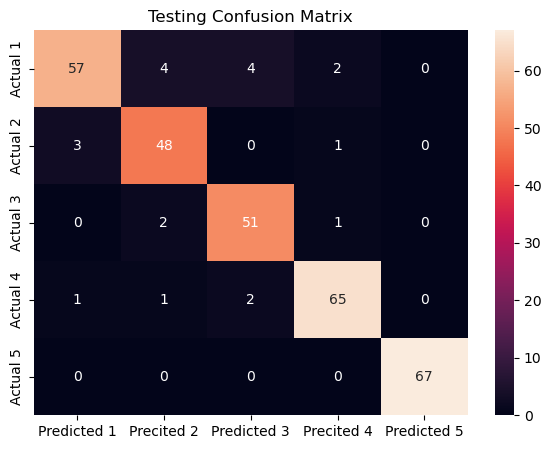

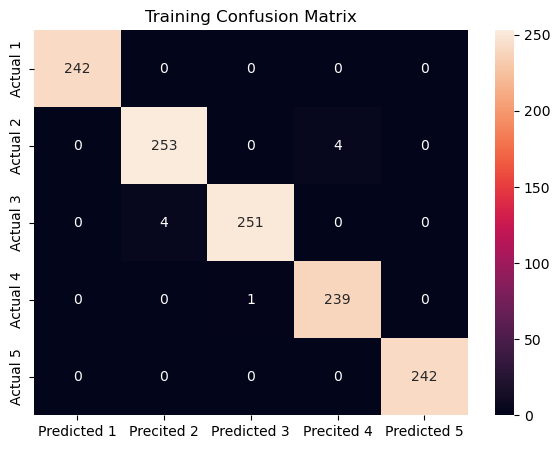

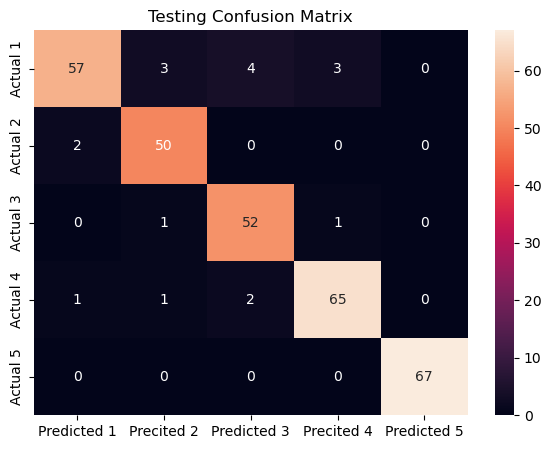

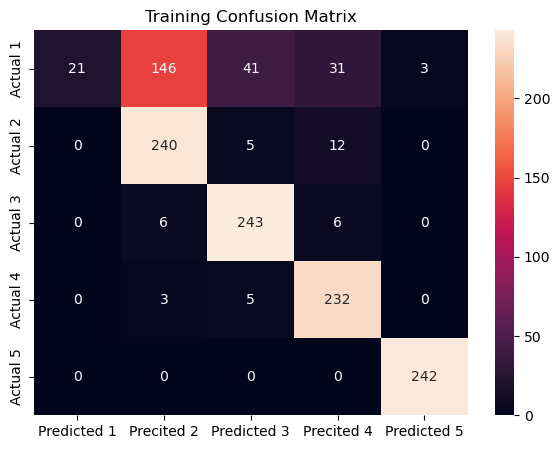

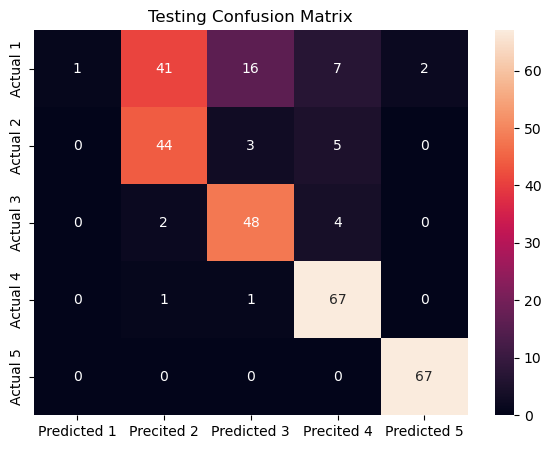

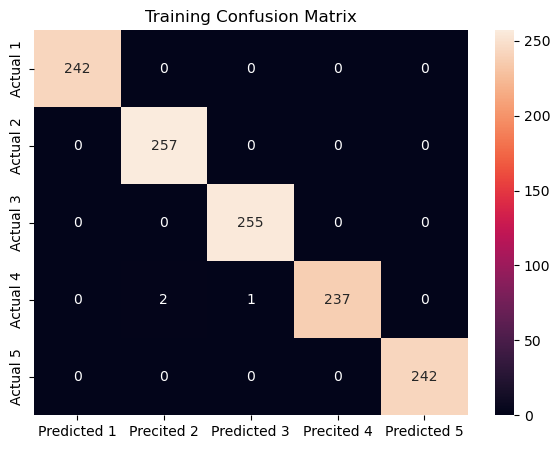

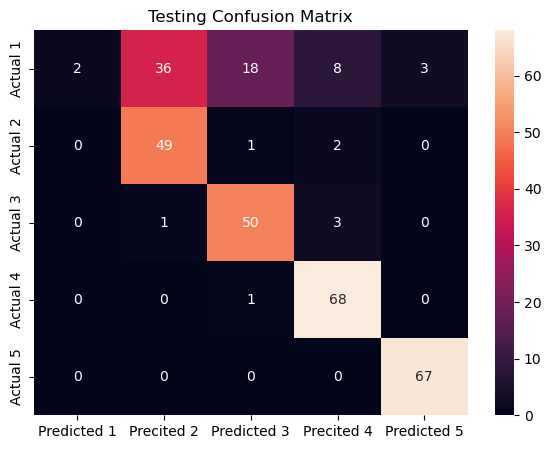

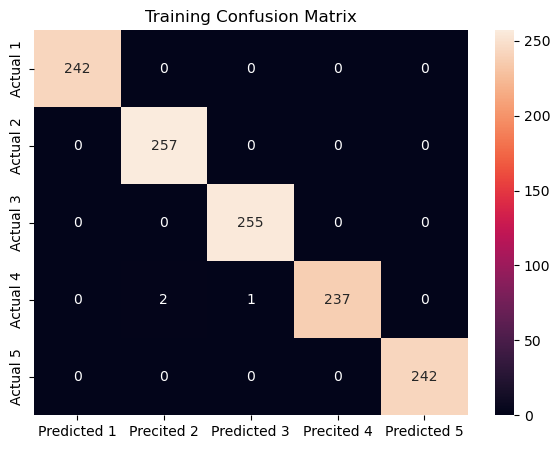

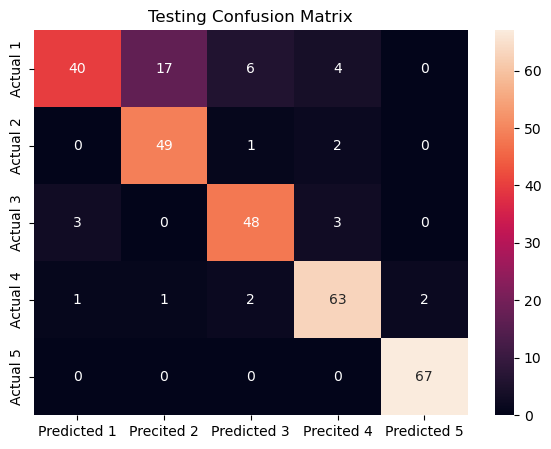

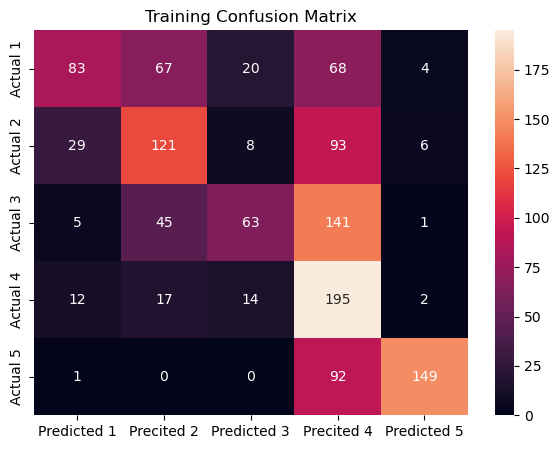

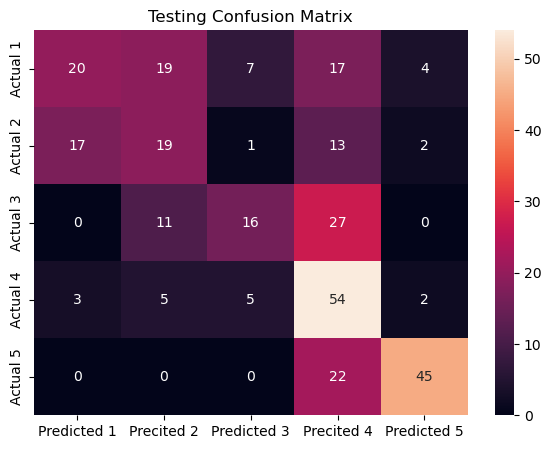

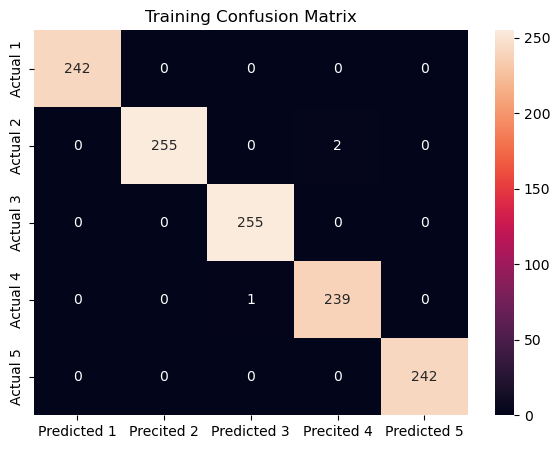

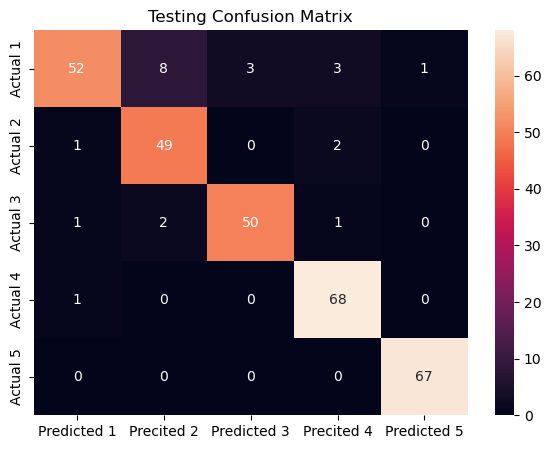

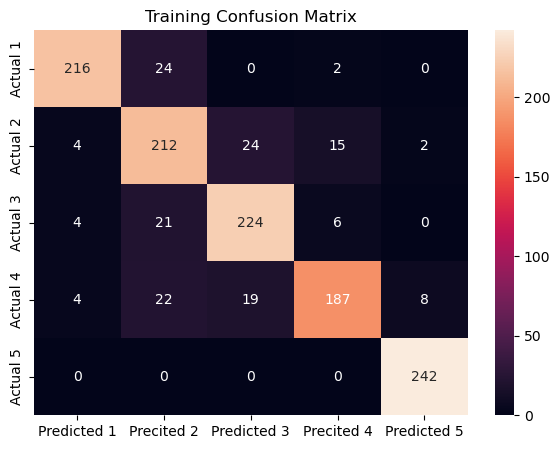

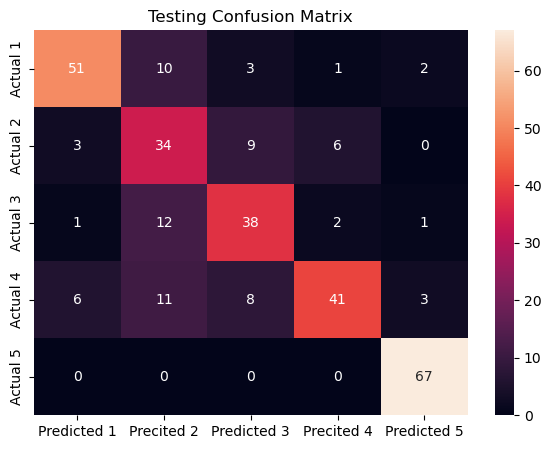

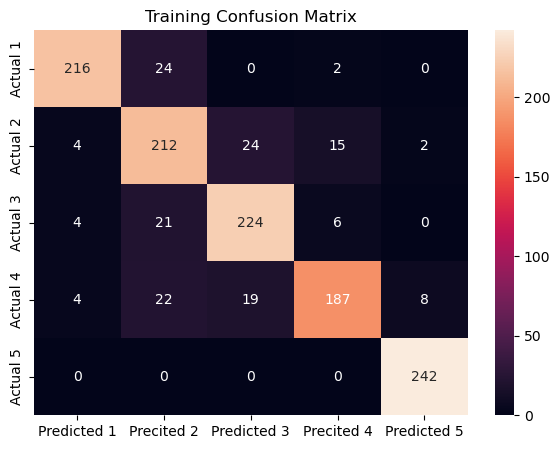

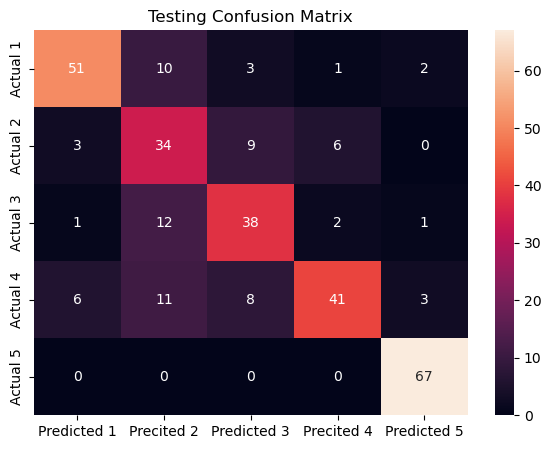

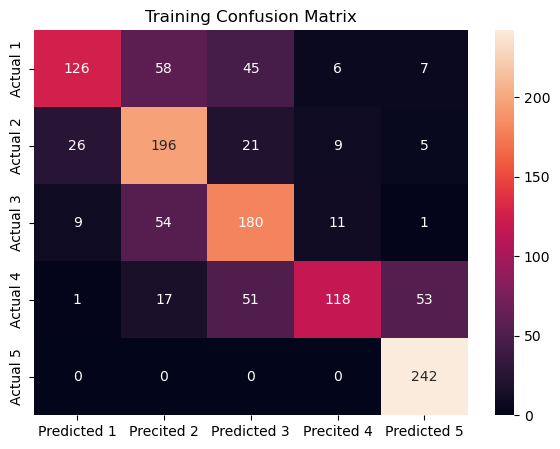

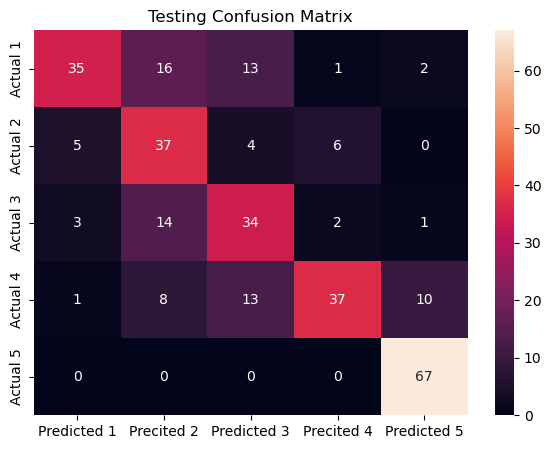

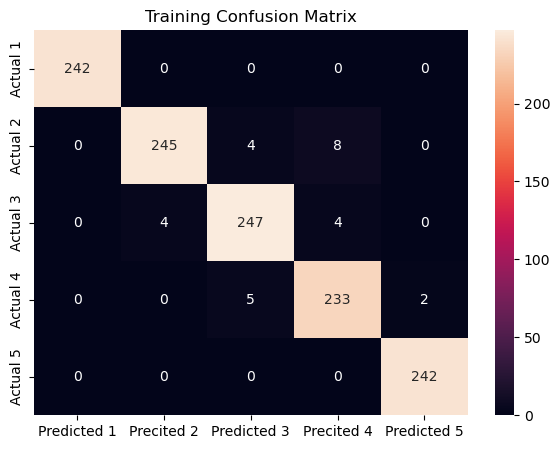

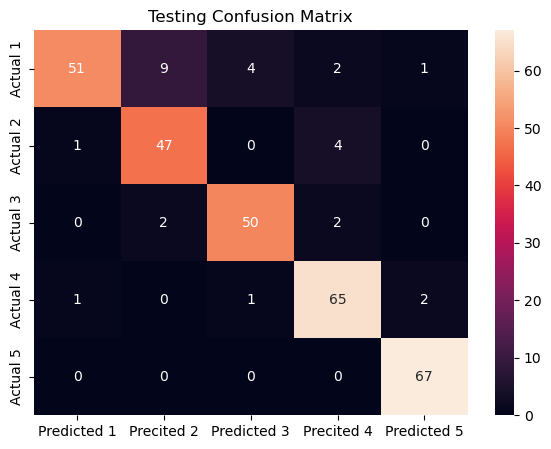

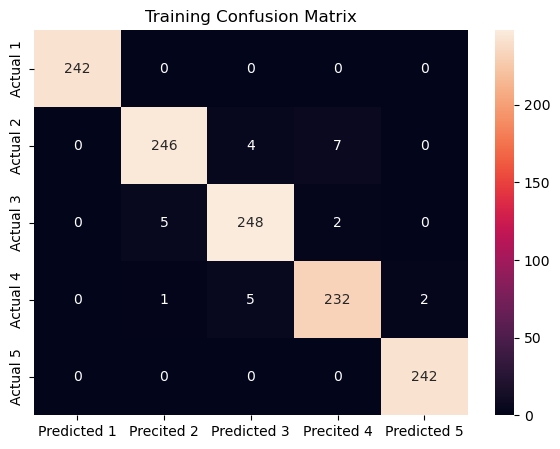

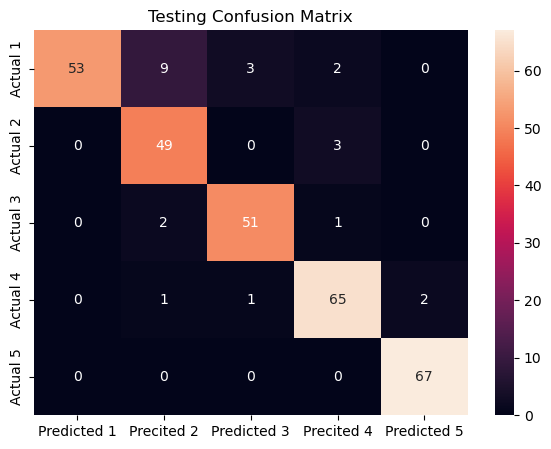

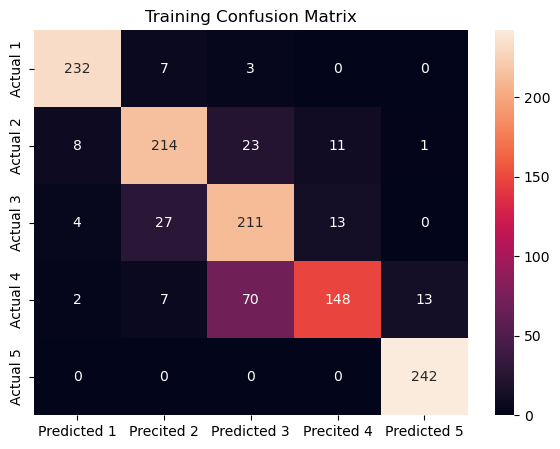

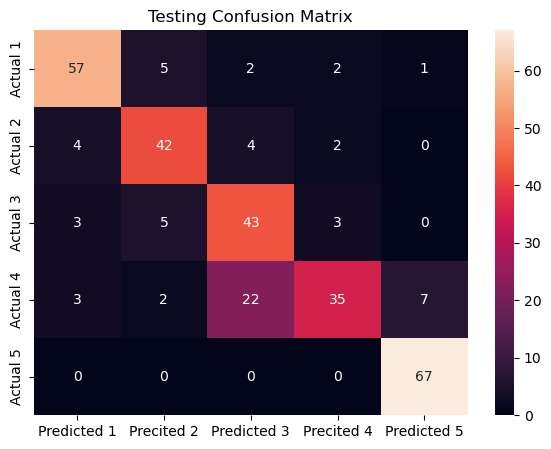

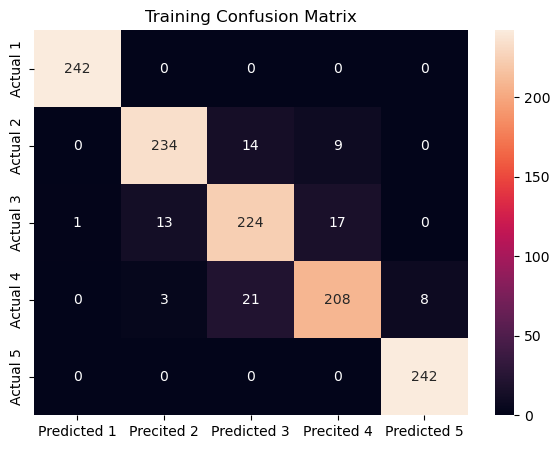

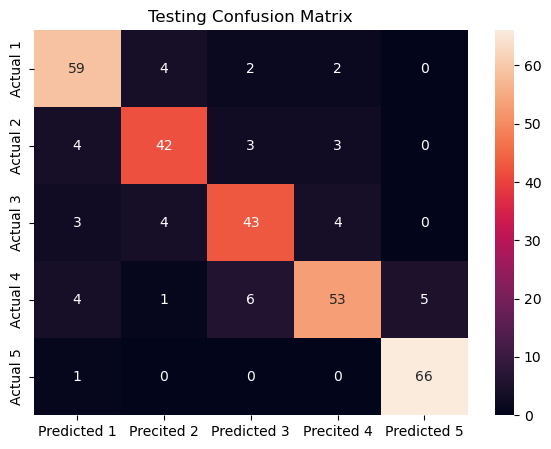

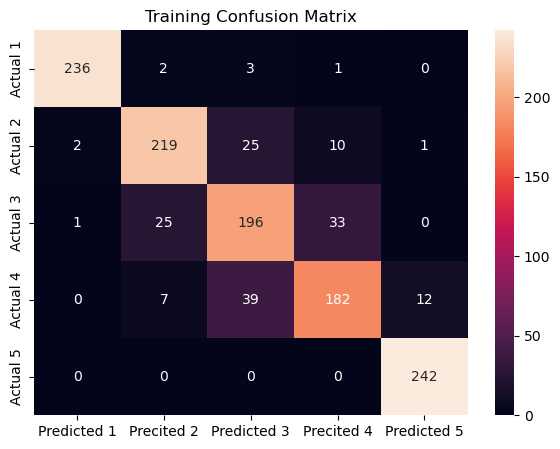

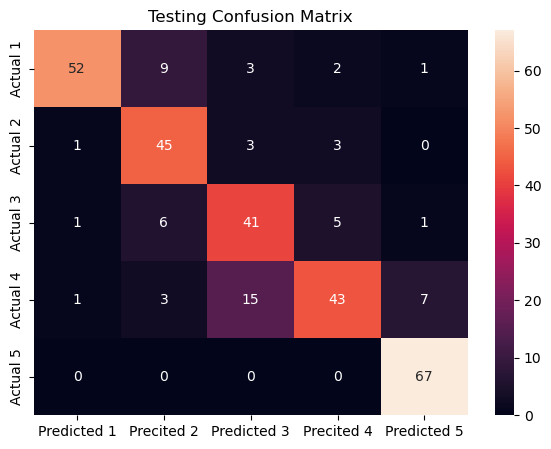

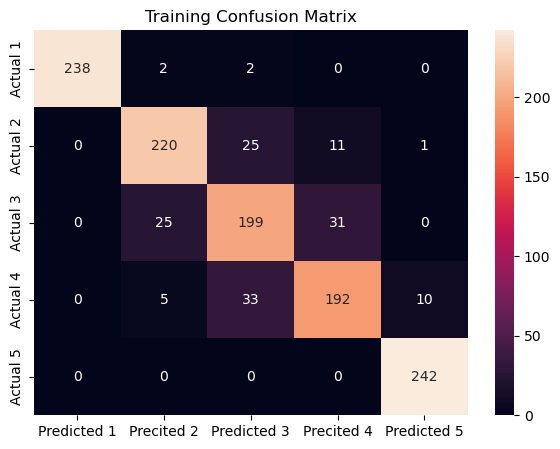

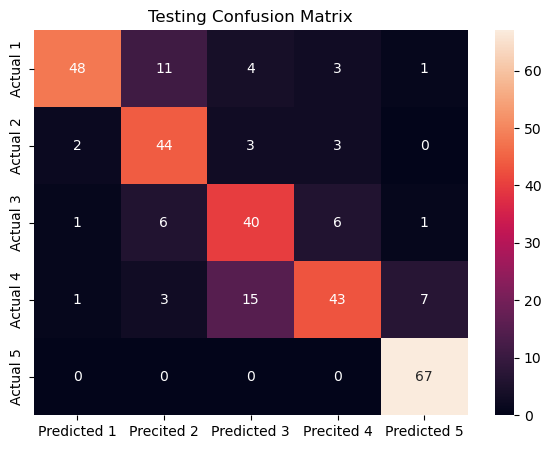

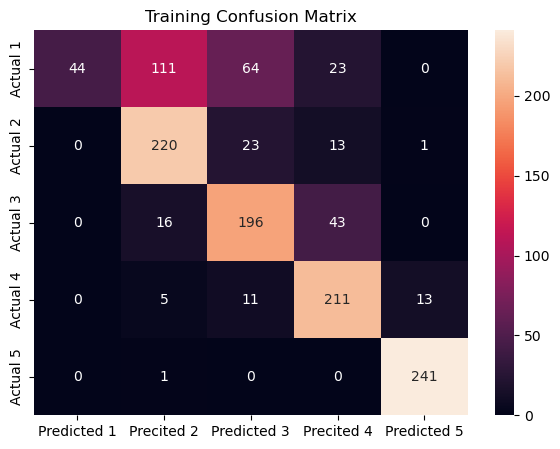

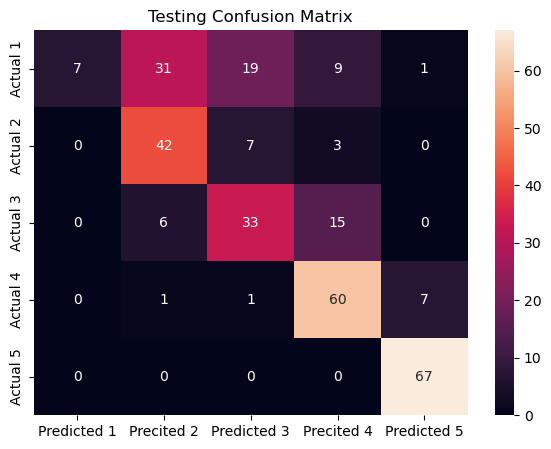

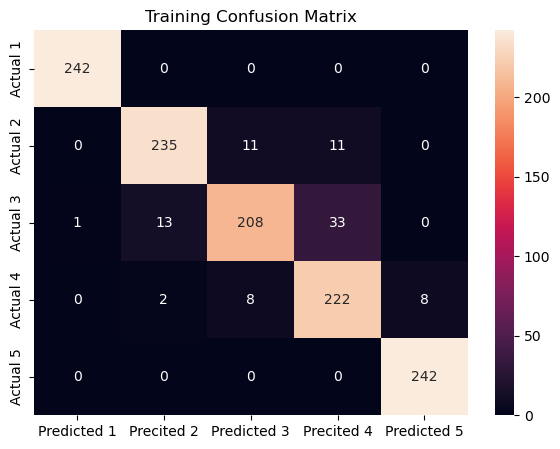

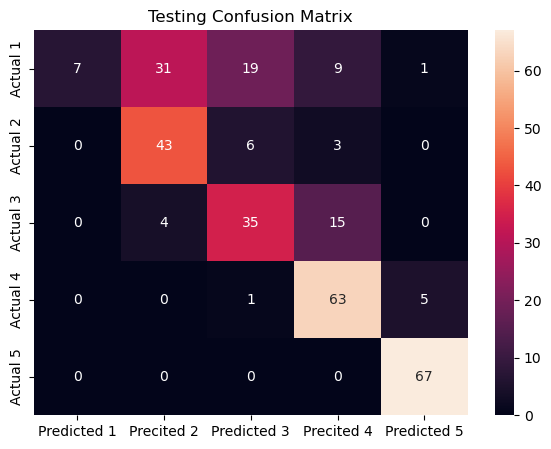

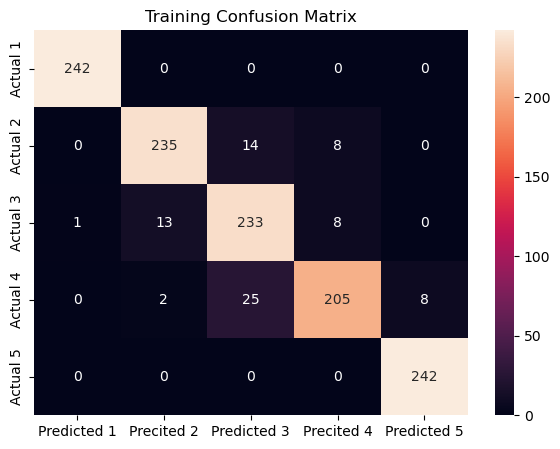

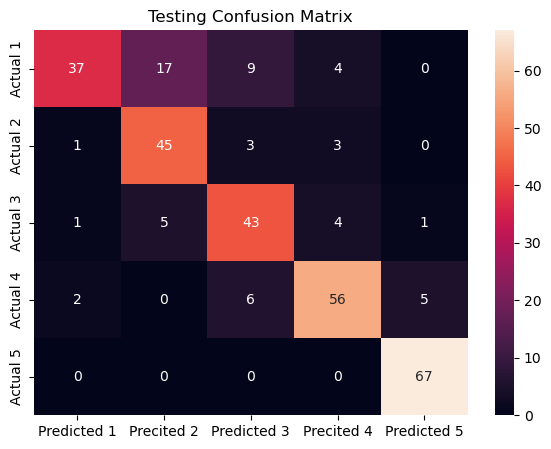

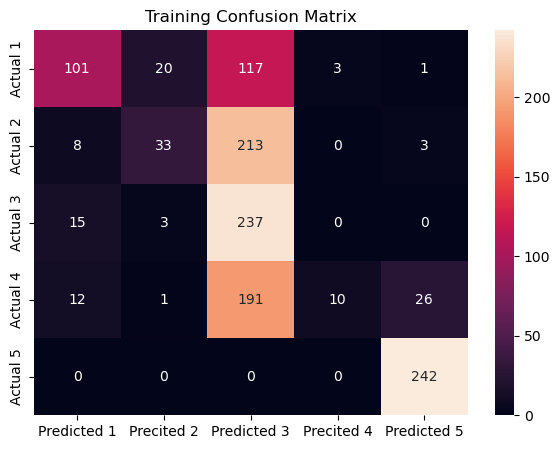

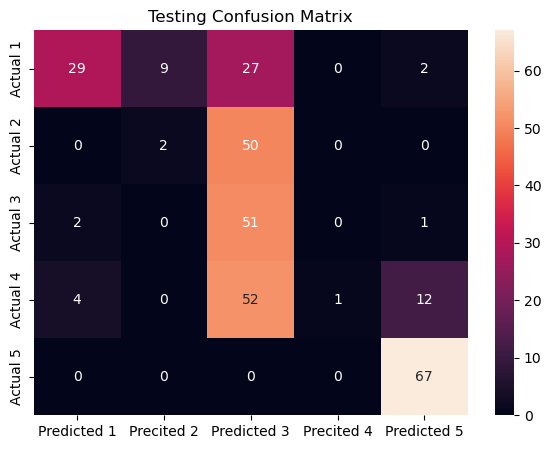

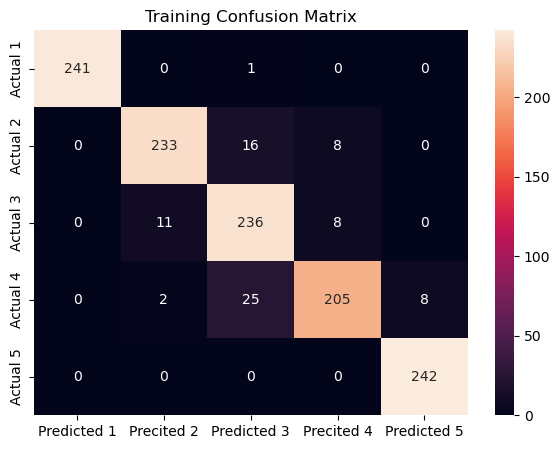

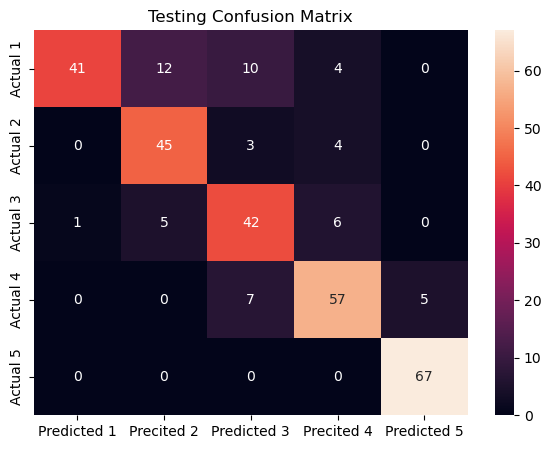

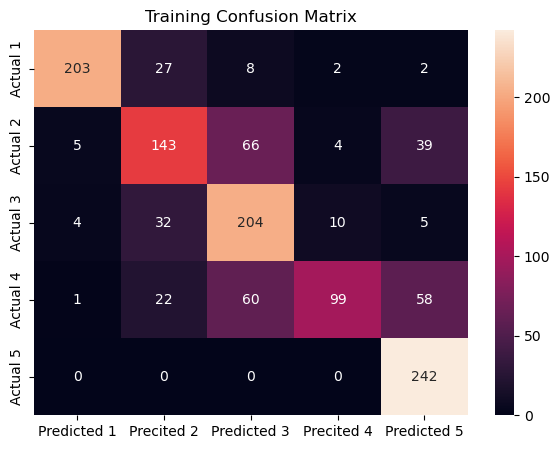

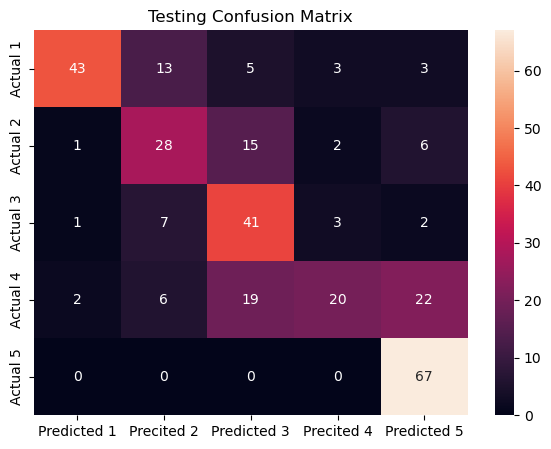

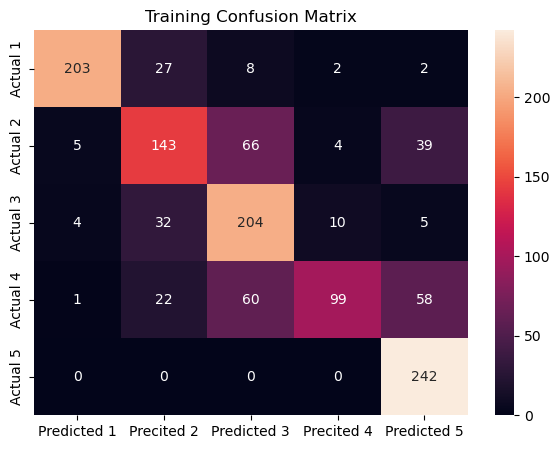

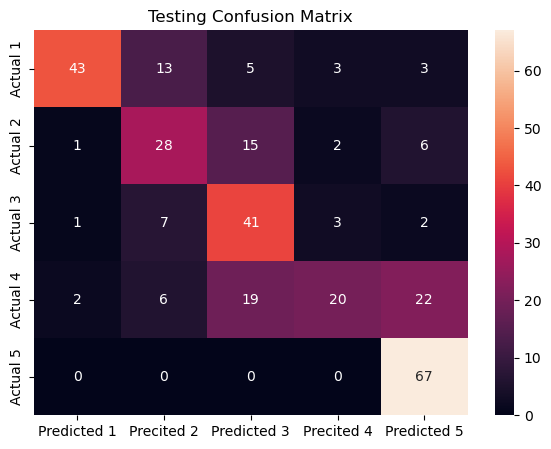

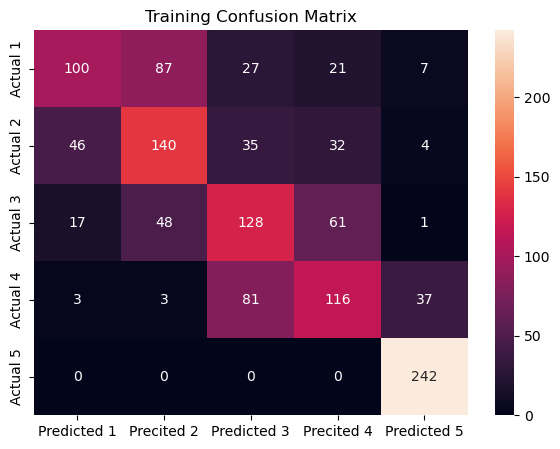

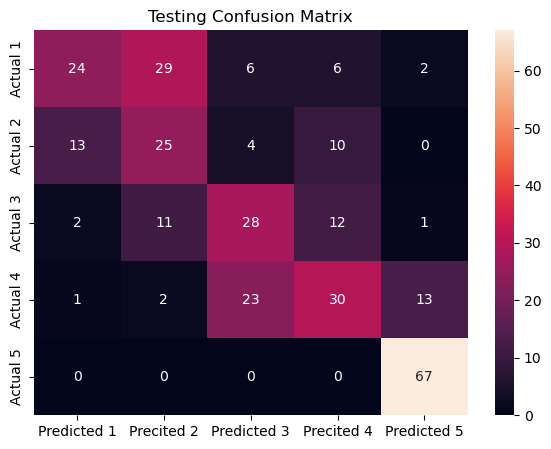

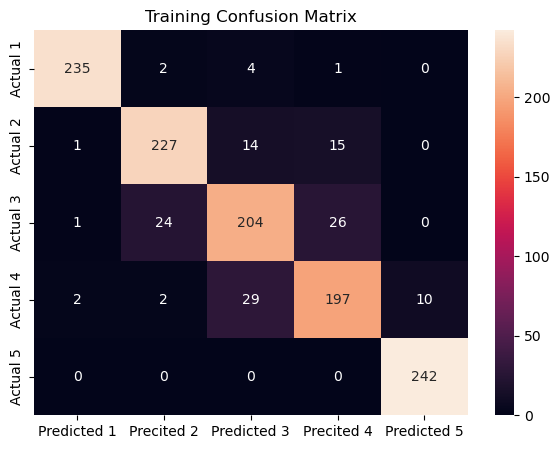

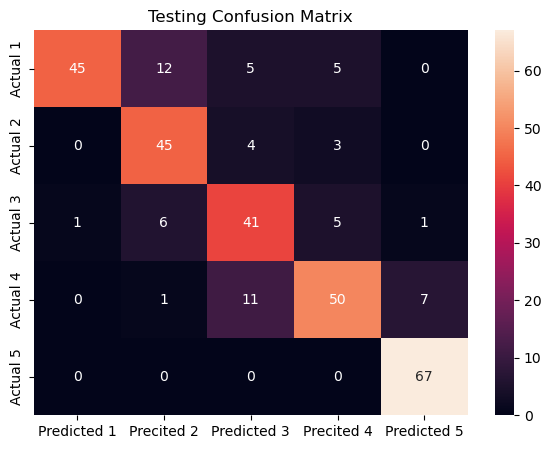

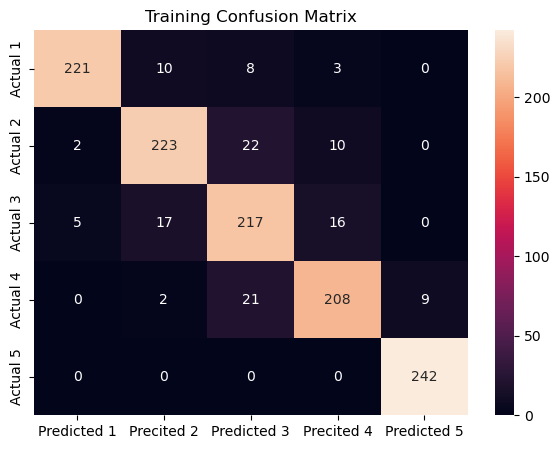

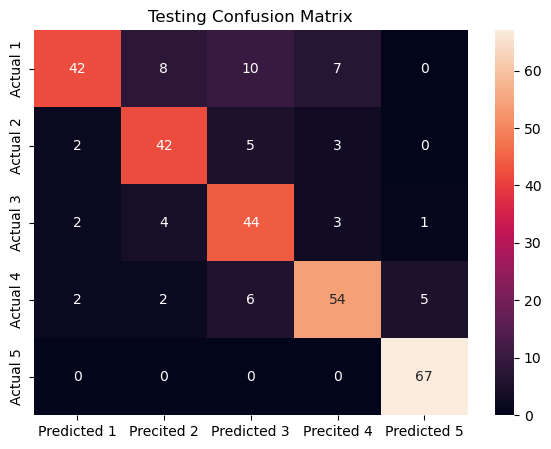

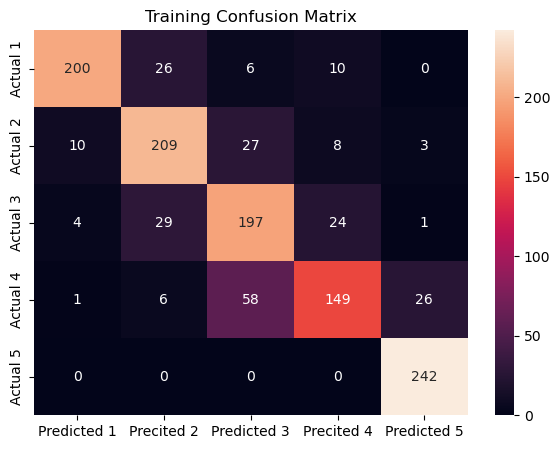

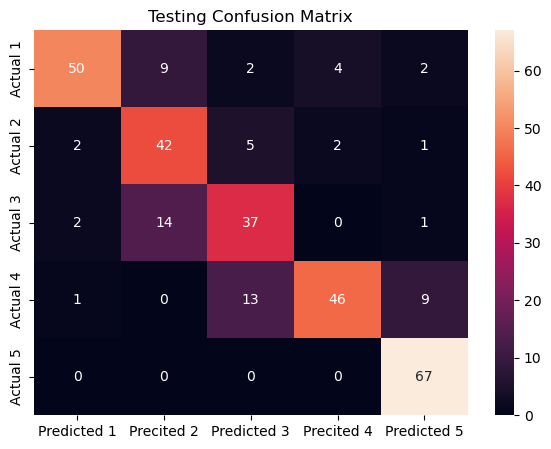

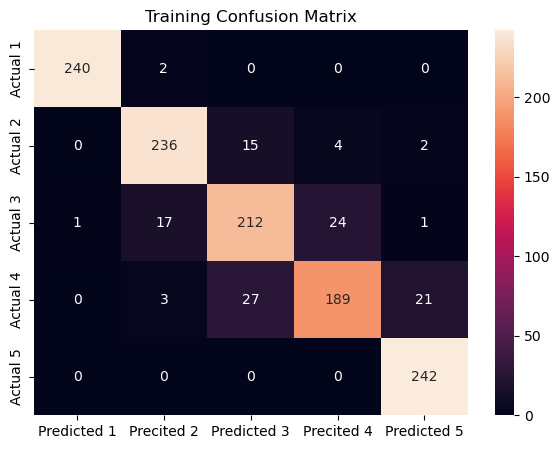

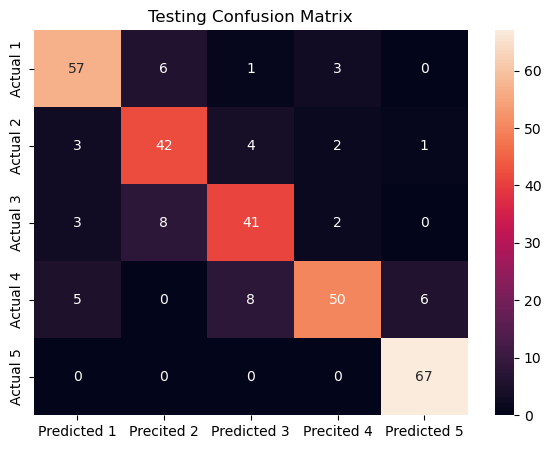

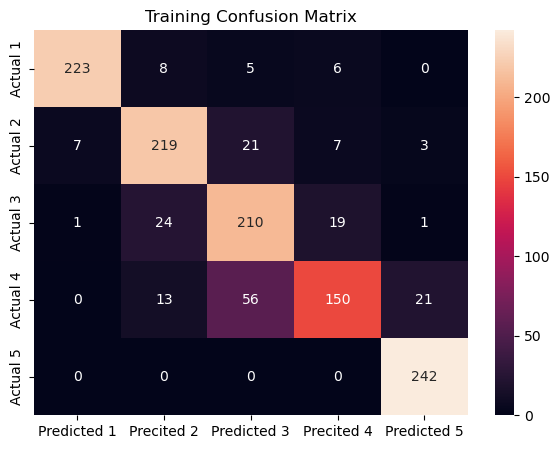

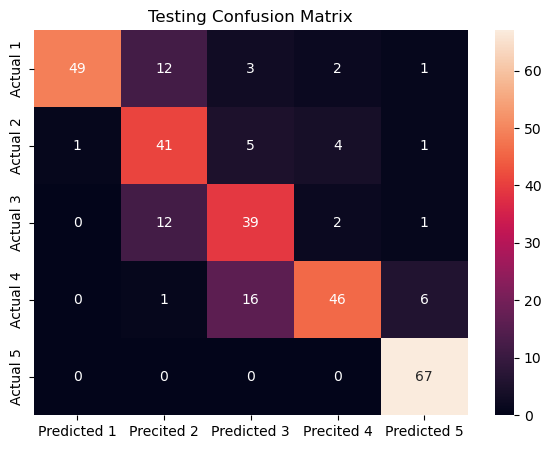

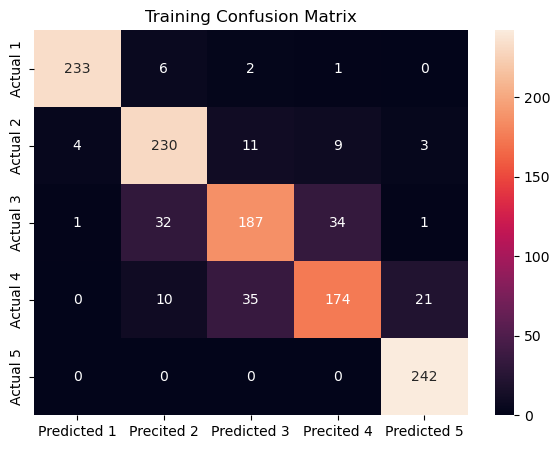

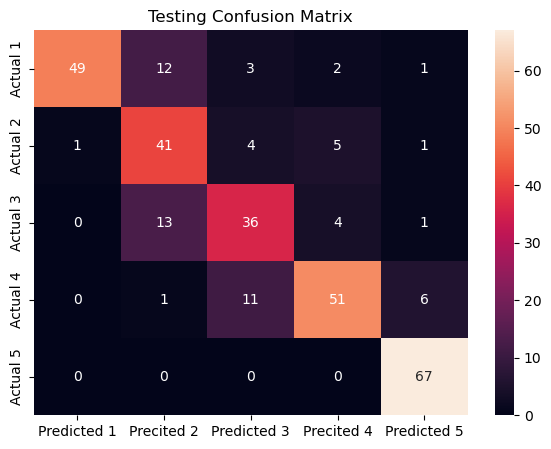

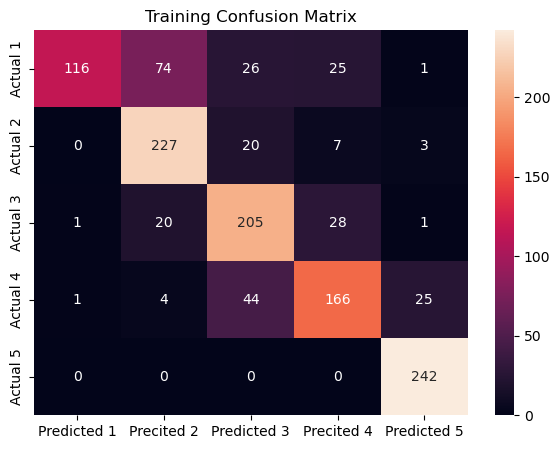

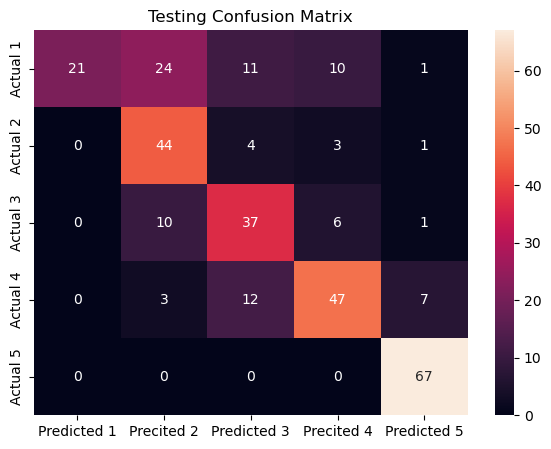

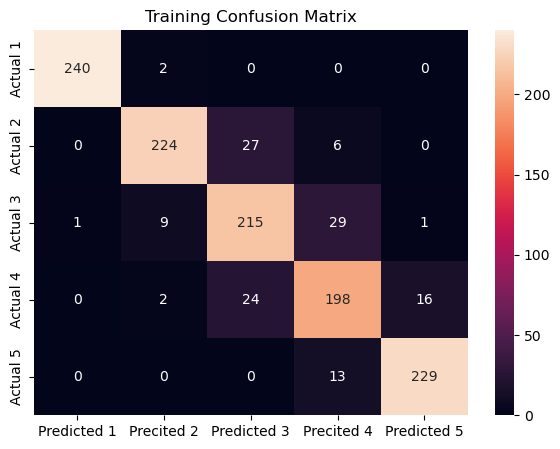

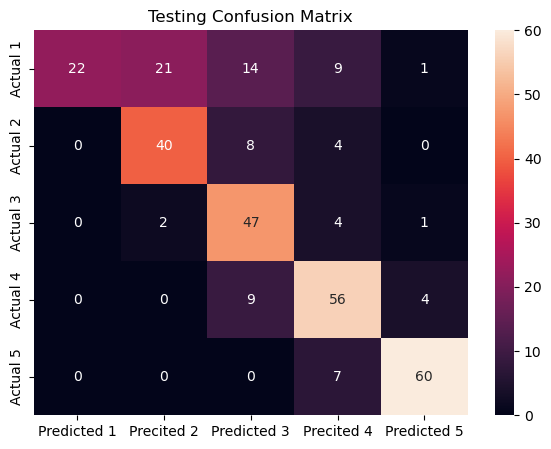

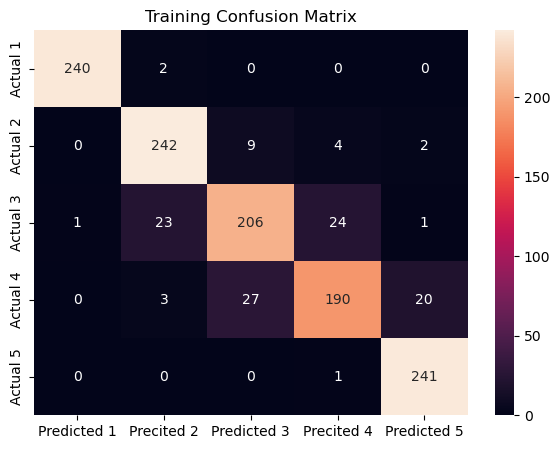

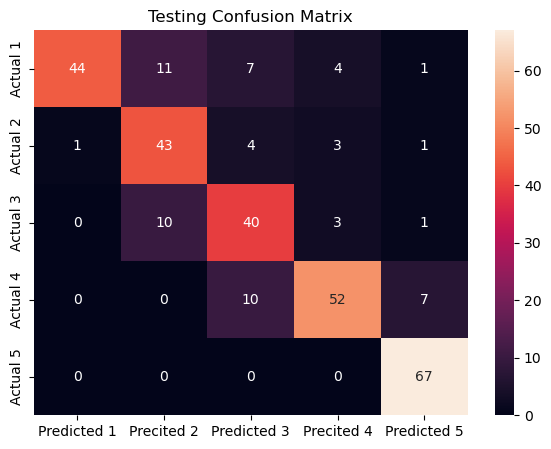

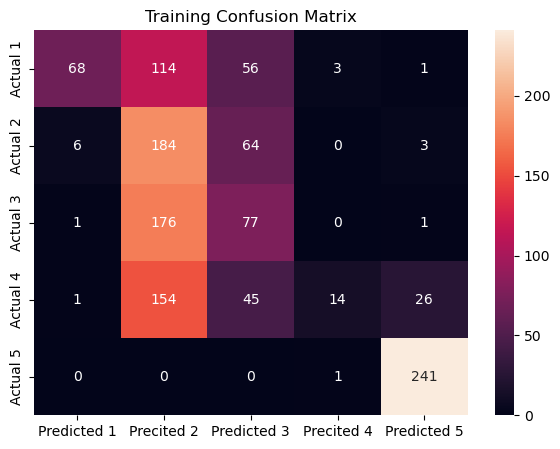

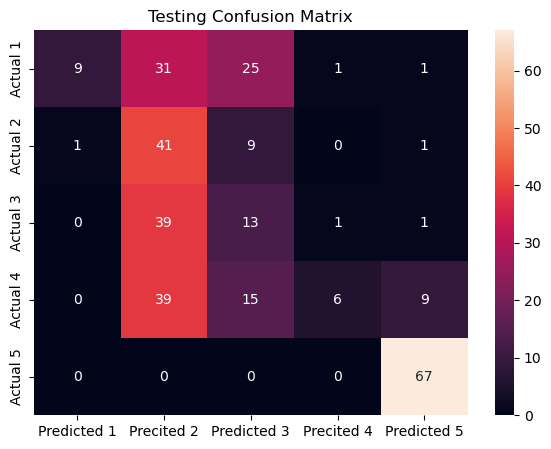

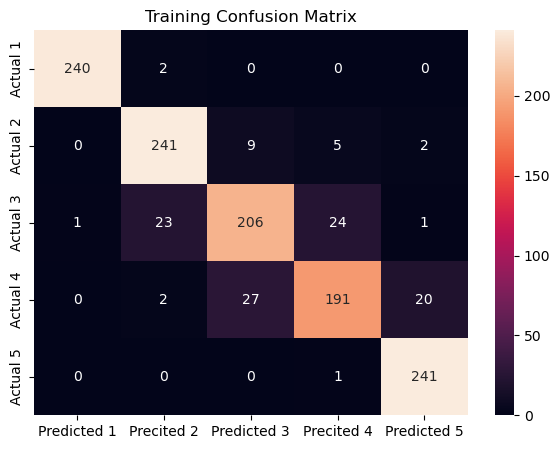

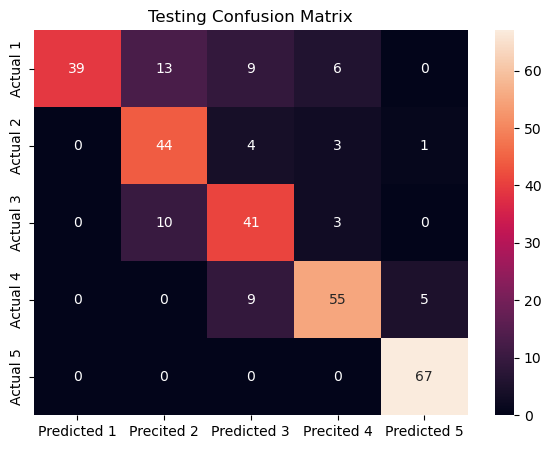

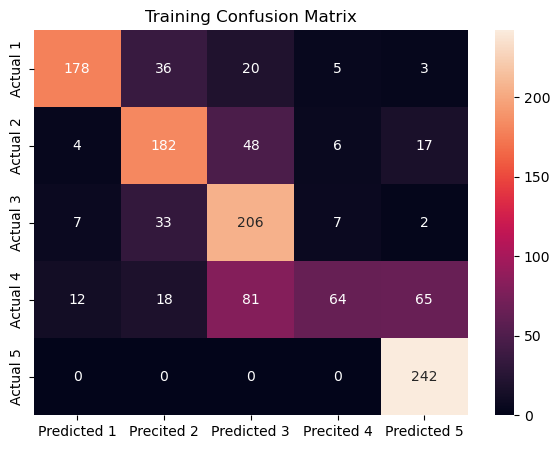

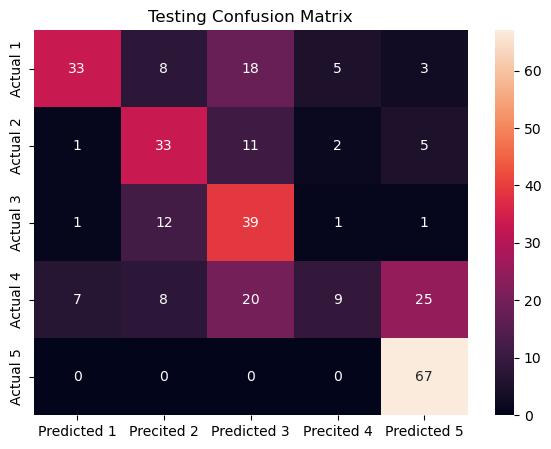

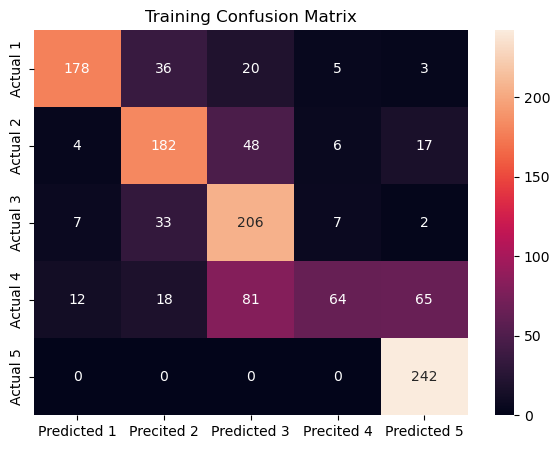

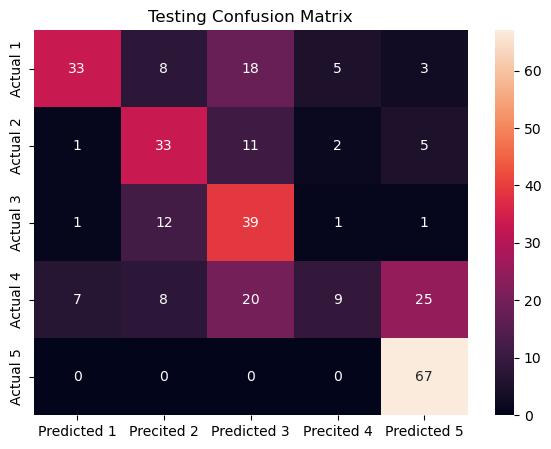

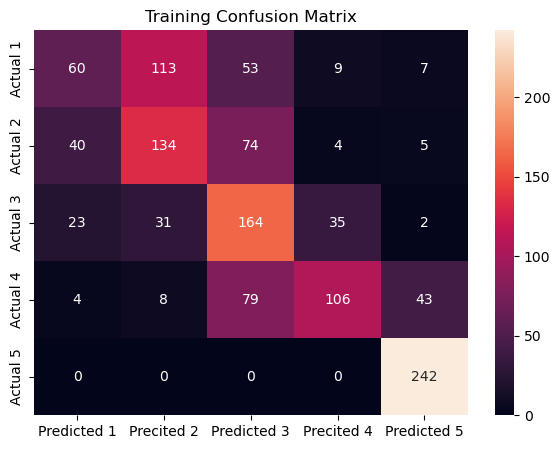

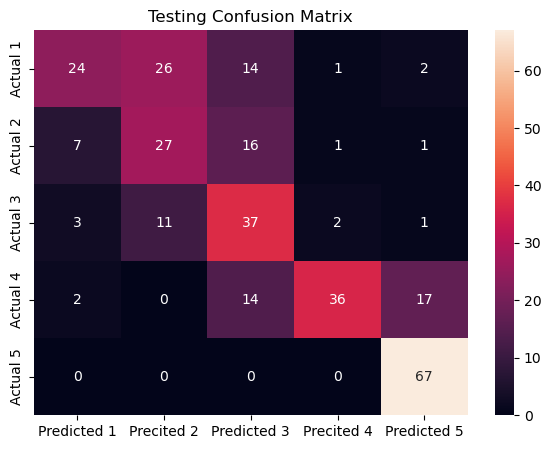

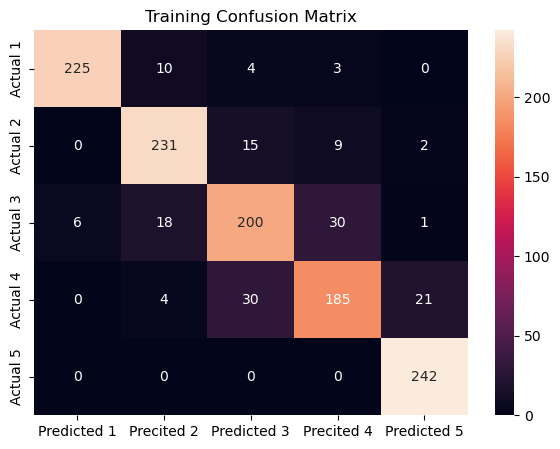

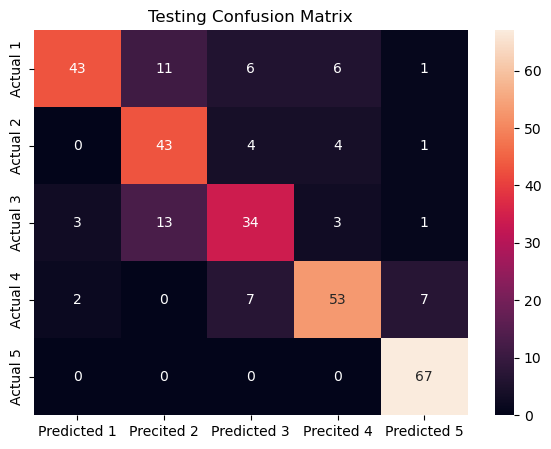

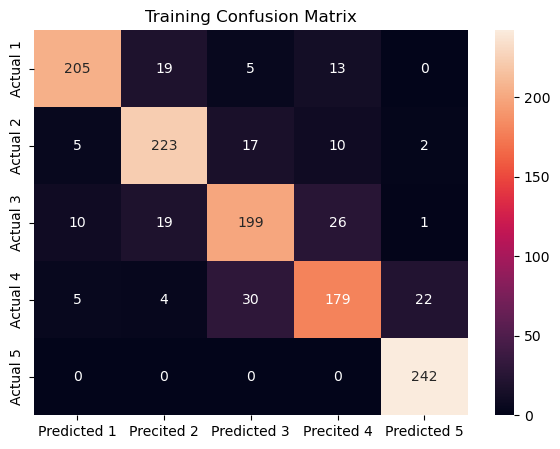

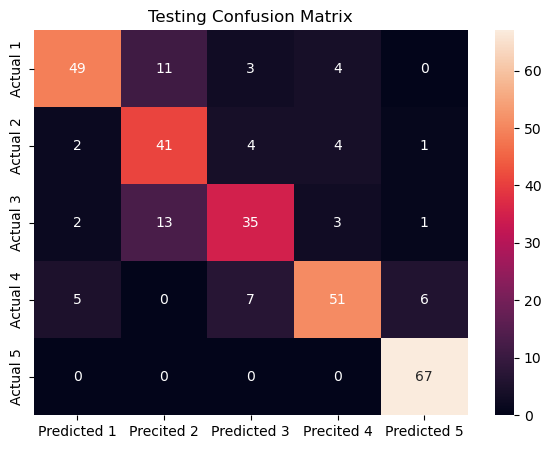

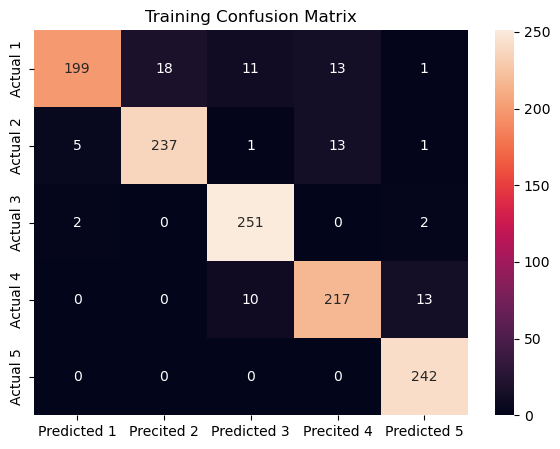

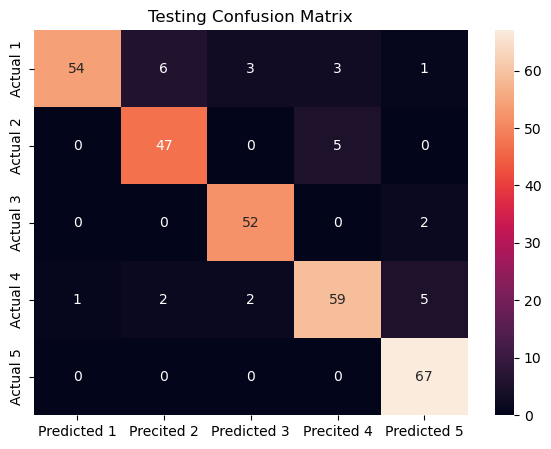

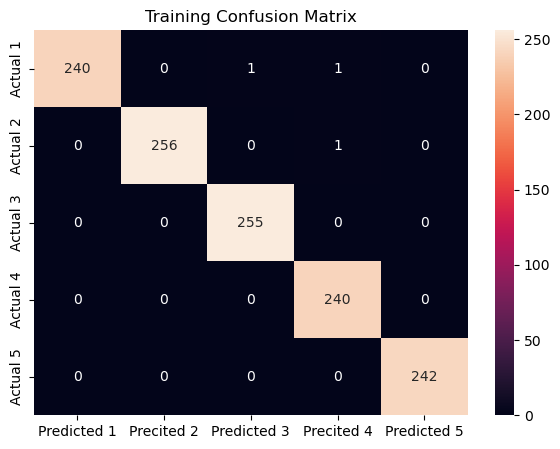

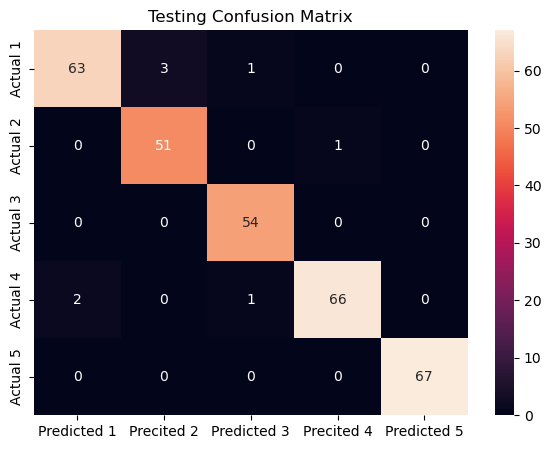

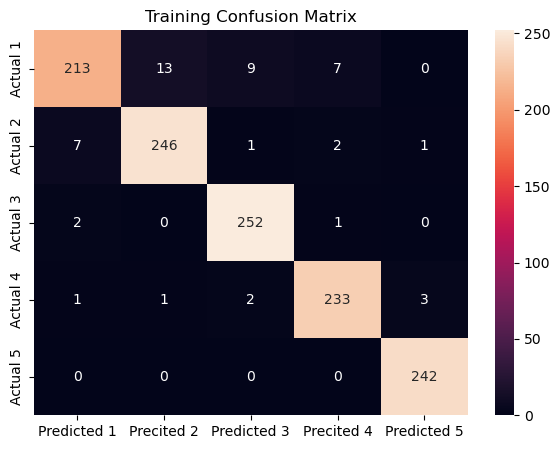

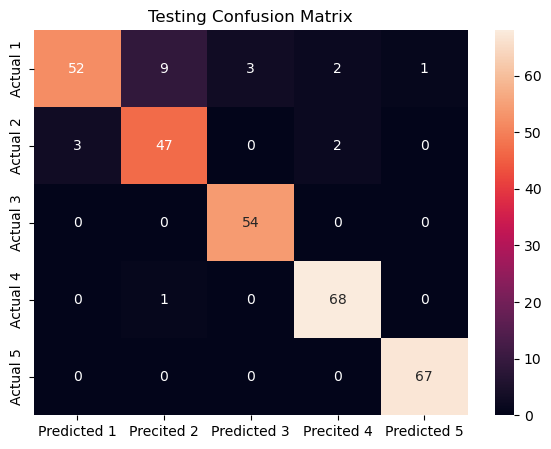

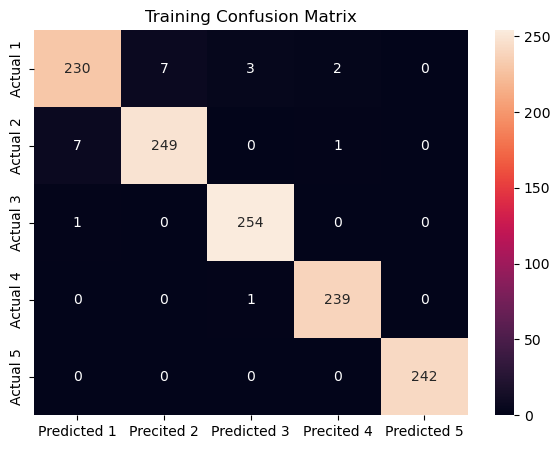

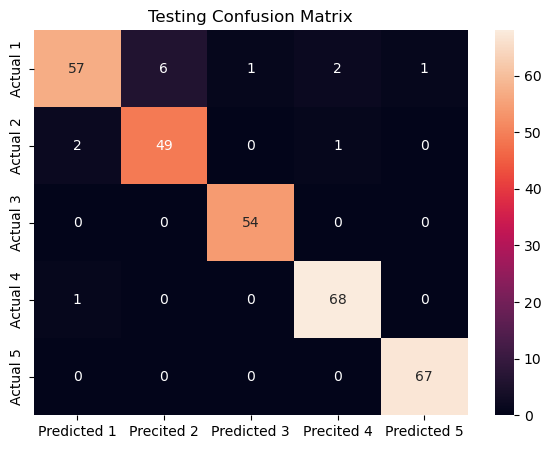

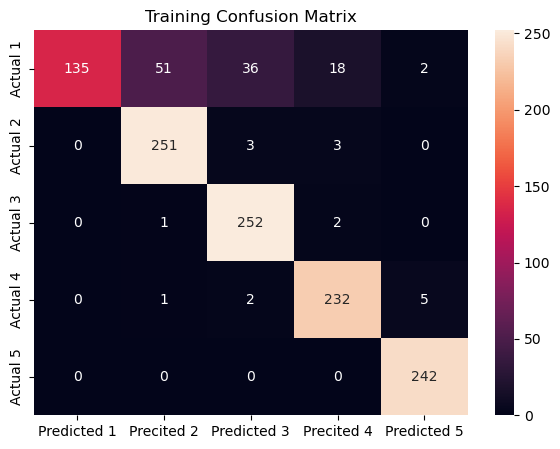

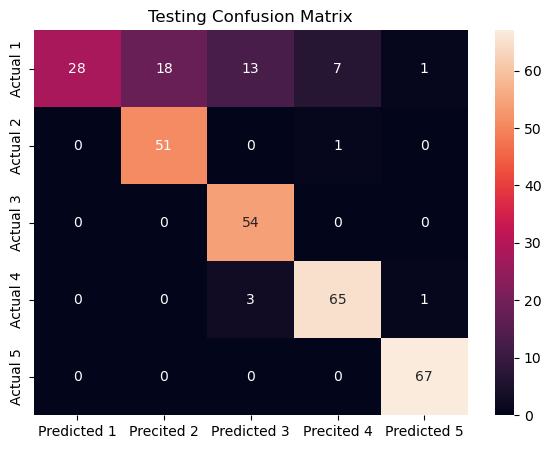

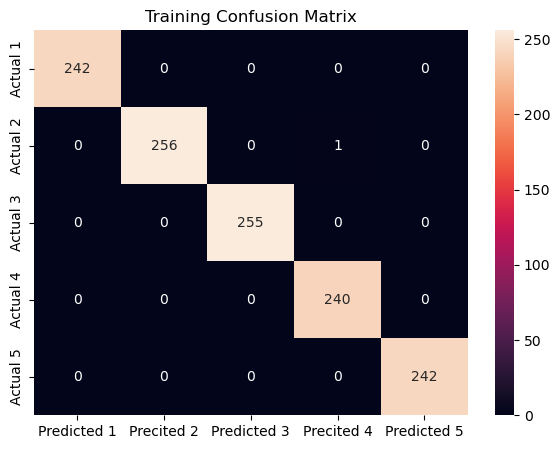

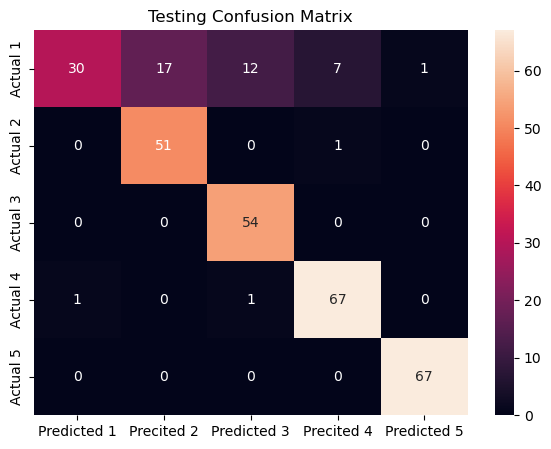

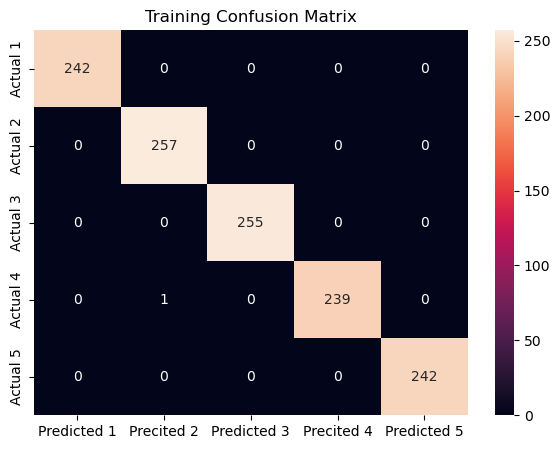

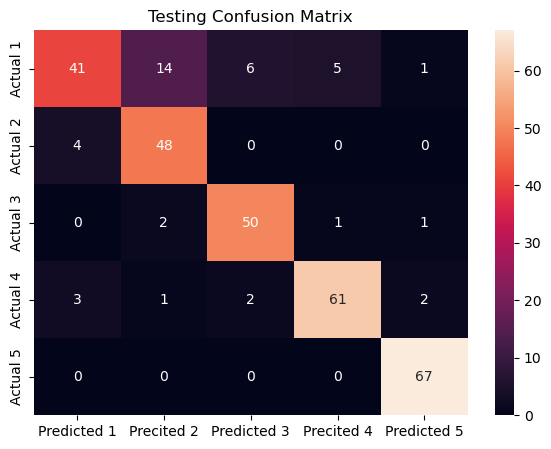

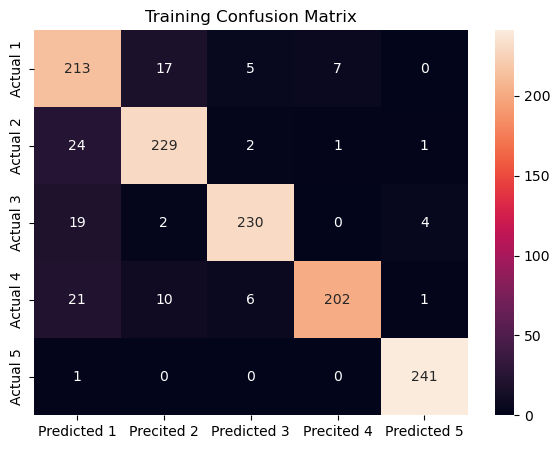

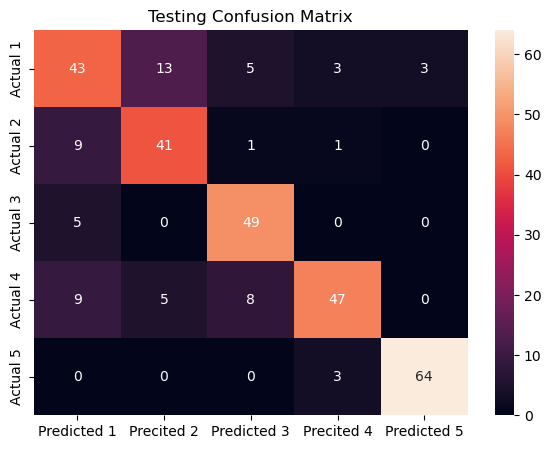

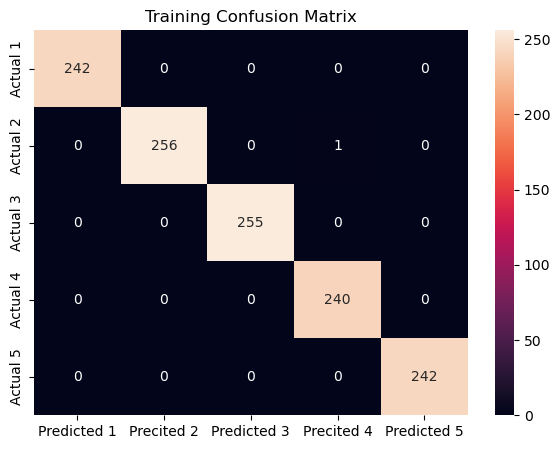

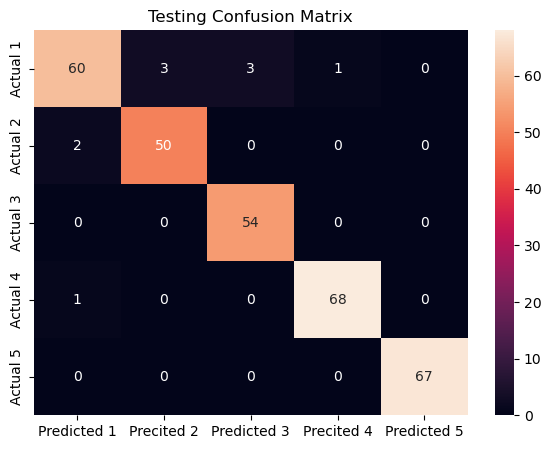

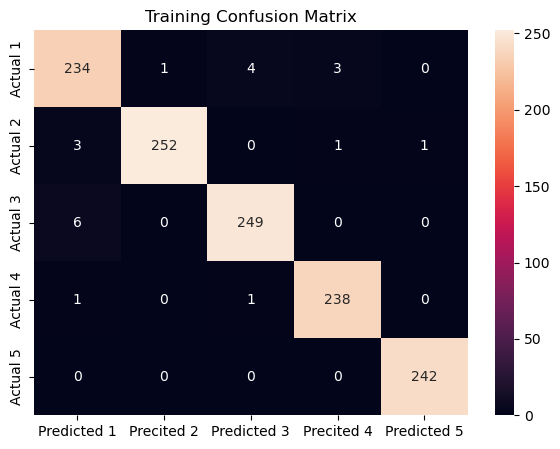

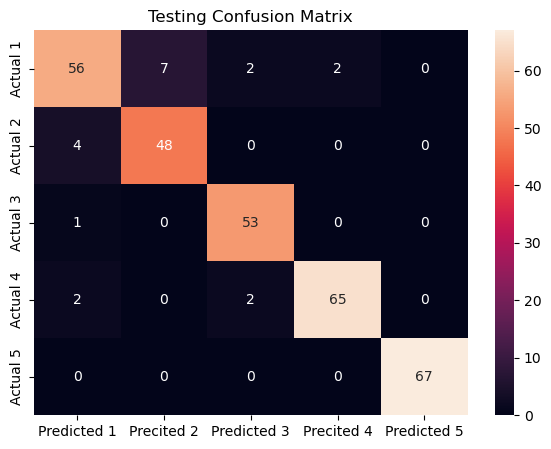

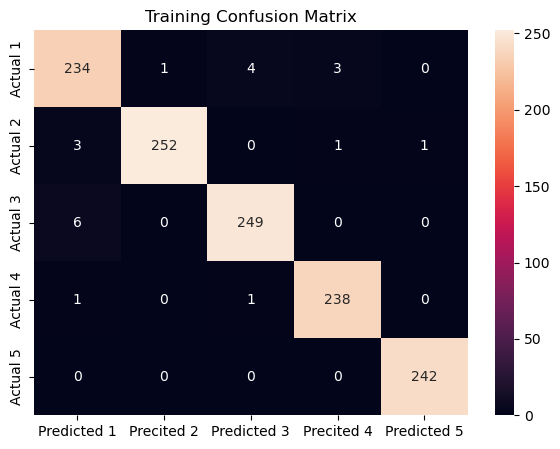

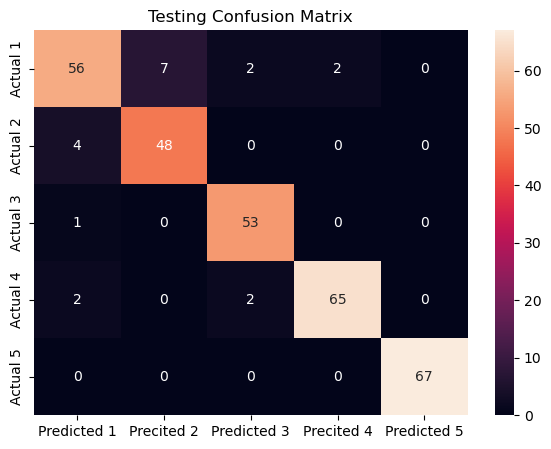

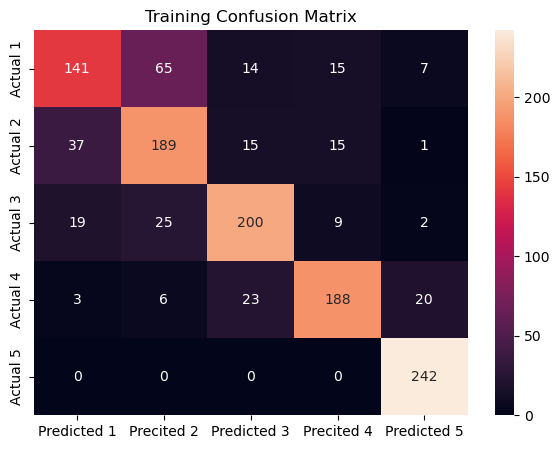

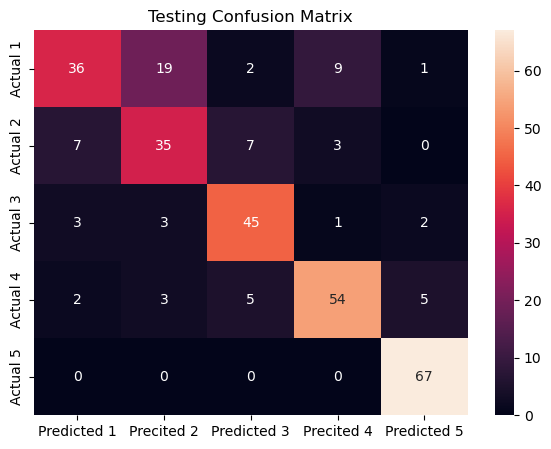

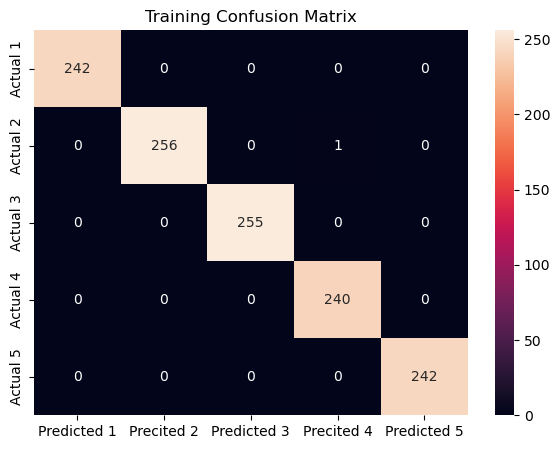

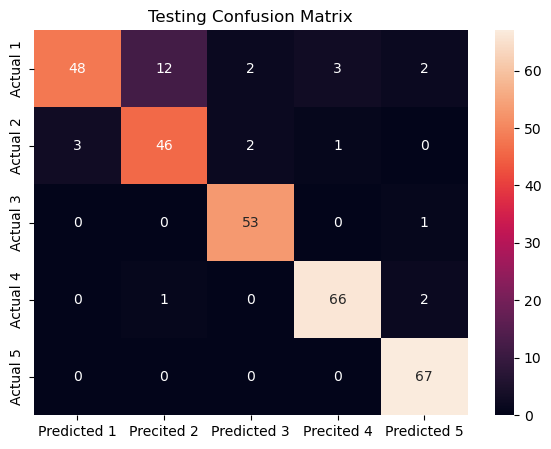

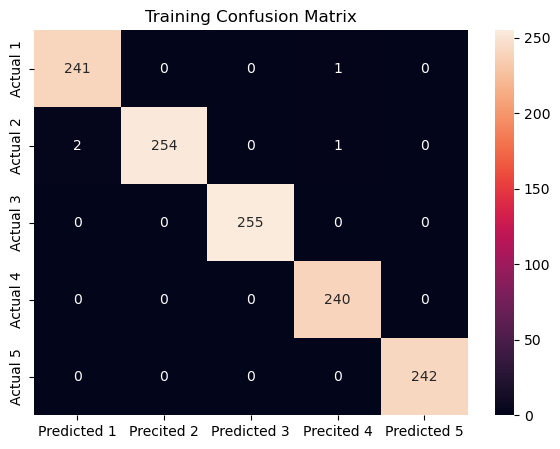

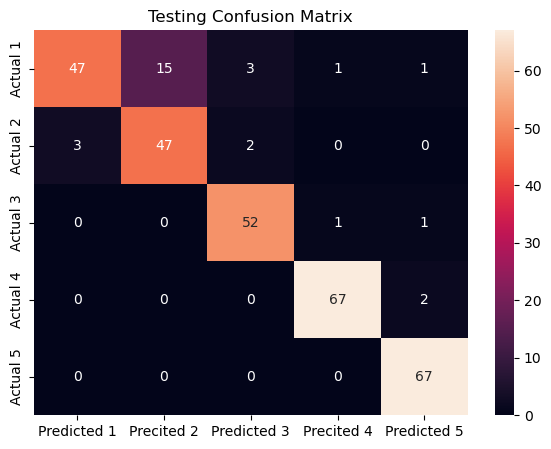

In [12]:
for df_name in dataframe_list:
    X_train, y_train, X_test, y_test = upsample_df(df_name)
    model_building(df_name, X_train, y_train, X_test, y_test)